## Stock Price Prediction

Contents :

1. Importing required libraries

    - Load libraries

2. Loading the data

    - Reading and viewing the dataset using pandas

    - understanding the data

3. Data Preprocesssing

    - Data Statistics

    - Selecting fraction of data

4. Data Visulalization

    - Stock coparision

    - matplotlib Plots

    - correlation Heatmap

    - visualizing multiple features in single plot

    - shading area under the curve

    - box plot

5. Feature Engineering

    - Generating New Features based on Important features

    - Setting Index as Date

    - Visual Representation of Closing Price

    - Generating New Features - Lag and Window Features for features related to Closing Price

    - Setting All Null/NaN values of a feature as mean of that feature

    - Setting Date as Index and viewing Dataset

    - Extracting Date Time Features from the dataset

    - Removing Unneccesary features

6. Model Building

   - Splitting Dataset into Training and Testing Data

   - Scaling Data and Transforming it for Training

   - Importing XGBoost library

7. Model Training

   -  XGBoost Tuning

   - Plotting Results of the Model

   - Training Model Again

   - Plotting Results of the Model

8. Conclusion


## 1. Importing required libraries

In [110]:
!pip install 

ERROR: You must give at least one requirement to install (see "pip help install")


In [111]:
#Load libraries


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [112]:
# The below command sets the backend of matplotlib to ' inline ' backend
# It means the output of plotting commands is displayed inline

%matplotlib inline


## 2. Loading the data

In [113]:
# Reading and viewing the dataset using pandas



In [114]:
import yfinance as yf
import datetime

# Download Gold Futures data from Yahoo Finance
df = yf.download('GC=F', 
                 start='2023-01-01', 
                 end='2025-06-30')  # Note: end date is exclusive

# Reset index to make 'Date' a column
df.reset_index(inplace=True)

# Display the first few rows
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GC=F,GC=F,GC=F,GC=F,GC=F
0,2023-01-03,1839.699951,1839.699951,1836.199951,1836.199951,29
1,2023-01-04,1852.800049,1859.099976,1845.599976,1845.599976,25
2,2023-01-05,1834.800049,1855.199951,1834.800049,1855.199951,24
3,2023-01-06,1864.199951,1868.199951,1835.300049,1838.400024,26
4,2023-01-09,1872.699951,1880.000000,1867.000000,1867.000000,62


In [115]:
df.tail()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GC=F,GC=F,GC=F,GC=F,GC=F
619,2025-06-23,3377.699951,3387.899902,3350.000000,3365.899902,30
620,2025-06-24,3317.399902,3358.000000,3301.000000,3358.000000,538
621,2025-06-25,3327.100098,3331.199951,3310.600098,3321.600098,373
622,2025-06-26,3333.500000,3333.500000,3332.399902,3332.399902,2058
623,2025-06-27,3273.699951,3318.699951,3253.800049,3318.699951,284


In [116]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,GC=F,GC=F,GC=F,GC=F,GC=F
0,2023-01-03,1839.699951,1839.699951,1836.199951,1836.199951,29
1,2023-01-04,1852.800049,1859.099976,1845.599976,1845.599976,25
2,2023-01-05,1834.800049,1855.199951,1834.800049,1855.199951,24
3,2023-01-06,1864.199951,1868.199951,1835.300049,1838.400024,26
4,2023-01-09,1872.699951,1880.000000,1867.000000,1867.000000,62
...,...,...,...,...,...,...
619,2025-06-23,3377.699951,3387.899902,3350.000000,3365.899902,30
620,2025-06-24,3317.399902,3358.000000,3301.000000,3358.000000,538
621,2025-06-25,3327.100098,3331.199951,3310.600098,3321.600098,373


In [117]:
df.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'GC=F'),
            (  'High', 'GC=F'),
            (   'Low', 'GC=F'),
            (  'Open', 'GC=F'),
            ('Volume', 'GC=F')],
           names=['Price', 'Ticker'])

In [118]:
df.shape

(624, 6)

In [119]:
df.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GC=F,GC=F,GC=F,GC=F,GC=F
count,624,624.000000,624.000000,624.000000,624.000000,624.000000
mean,2024-03-30 16:18:27.692307712,2344.502721,2356.199360,2332.253524,2343.909132,4325.487179
min,2023-01-03 00:00:00,1808.800049,1808.800049,1808.099976,1808.099976,0.000000
25%,2023-08-16 18:00:00,1965.200012,1972.300018,1958.225037,1965.250031,67.000000
50%,2024-04-01 12:00:00,2248.750000,2271.699951,2238.800049,2243.849976,249.000000
75%,2024-11-11 06:00:00,2647.900024,2659.374939,2637.299988,2650.900085,794.000000
max,2025-06-27 00:00:00,3431.199951,3485.600098,3407.300049,3442.000000,202373.000000
std,NaN,449.733470,454.868501,443.759506,449.525545,22035.028828


In [120]:
df.isnull().sum()

Price   Ticker
Date              0
Close   GC=F      0
High    GC=F      0
Low     GC=F      0
Open    GC=F      0
Volume  GC=F      0
dtype: int64

In [121]:
#!pip install missingno

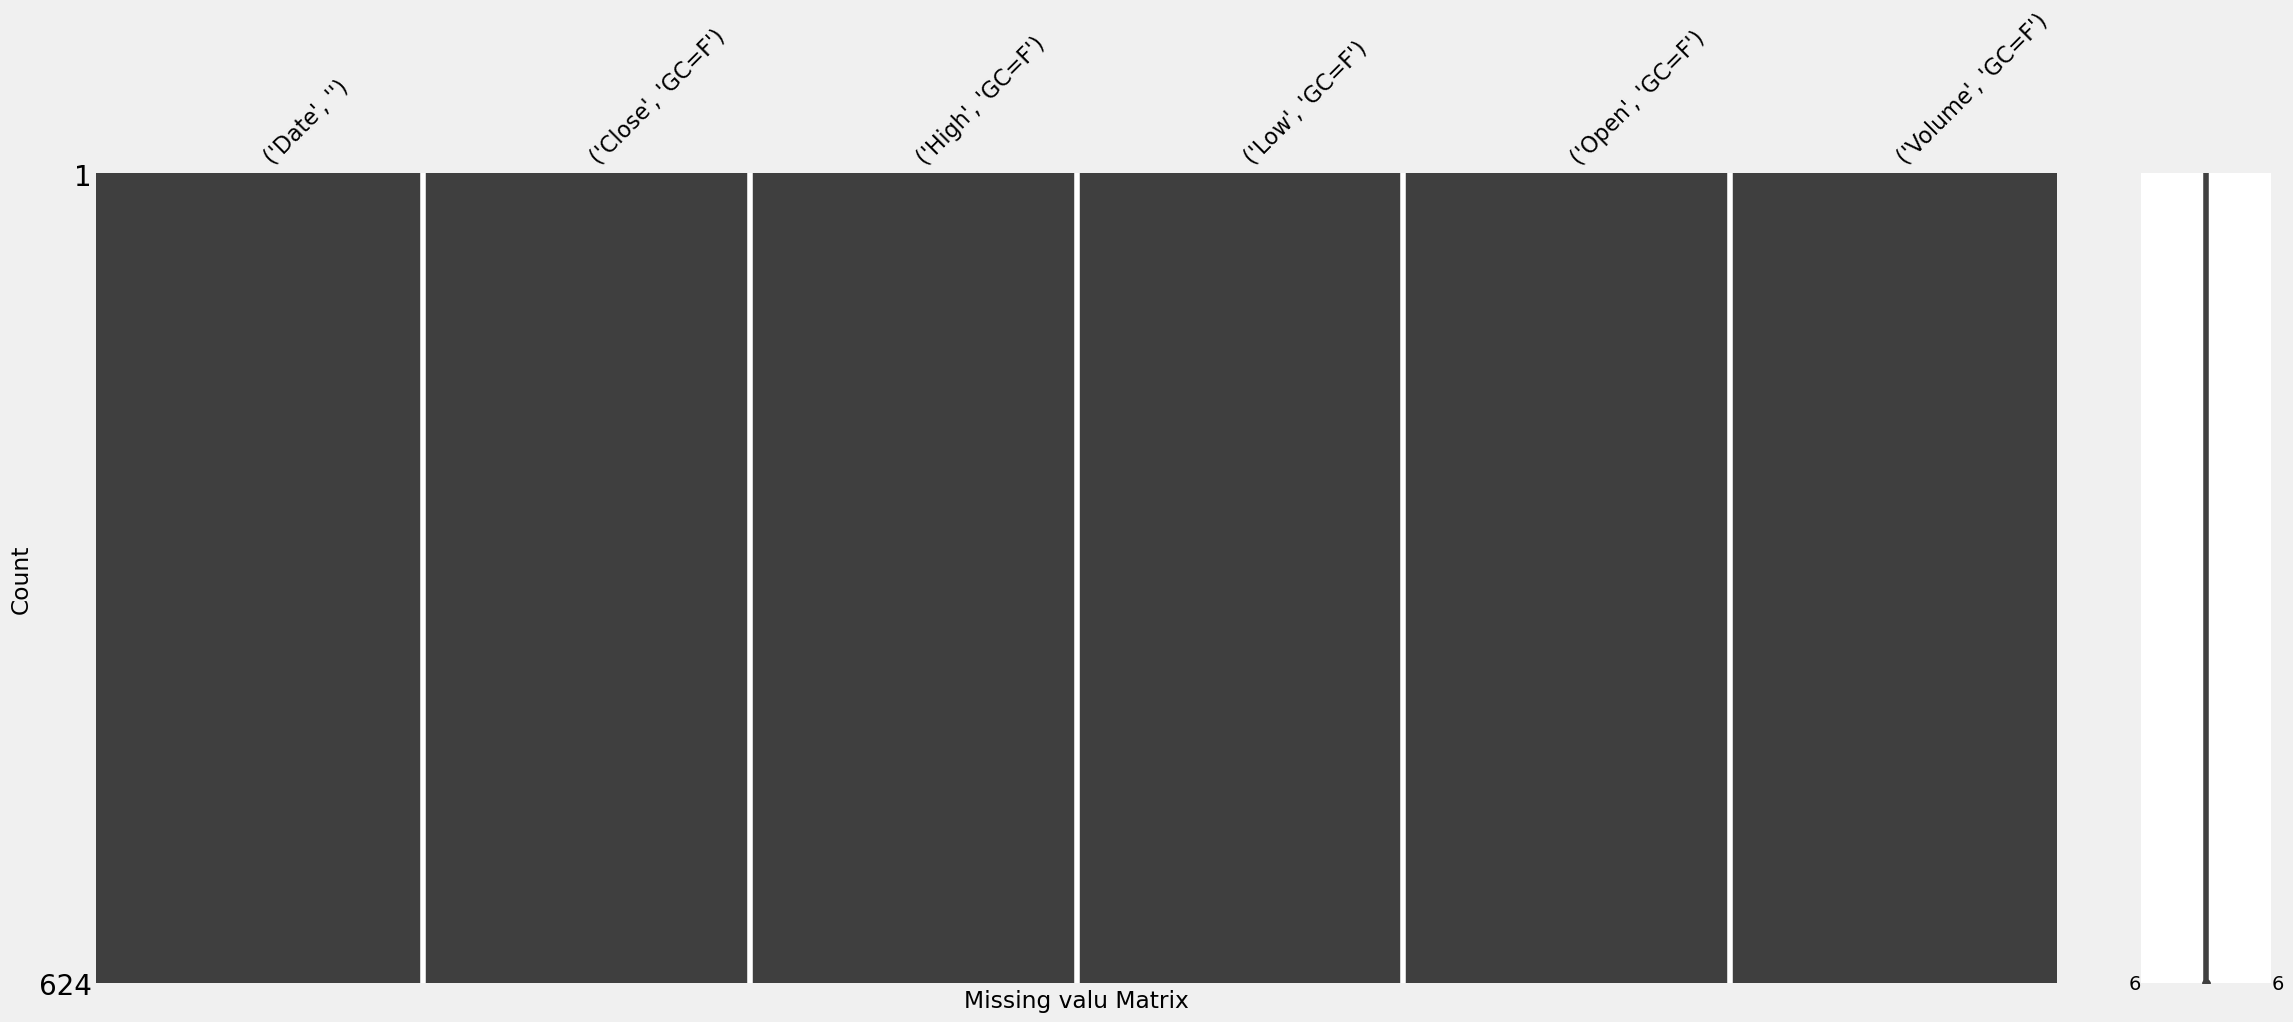

In [122]:
# Visualise Missing data 
import missingno as mnso
mnso.matrix(df)
plt.xlabel("Missing valu Matrix")
plt.ylabel("Count")

plt.show()

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        624 non-null    datetime64[ns]
 1   (Close, GC=F)   624 non-null    float64       
 2   (High, GC=F)    624 non-null    float64       
 3   (Low, GC=F)     624 non-null    float64       
 4   (Open, GC=F)    624 non-null    float64       
 5   (Volume, GC=F)  624 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 29.4 KB


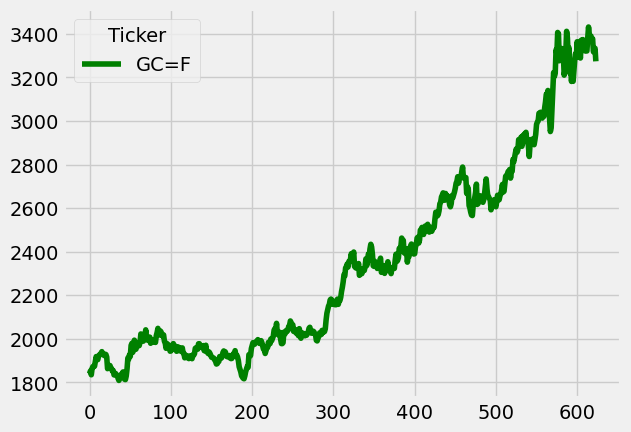

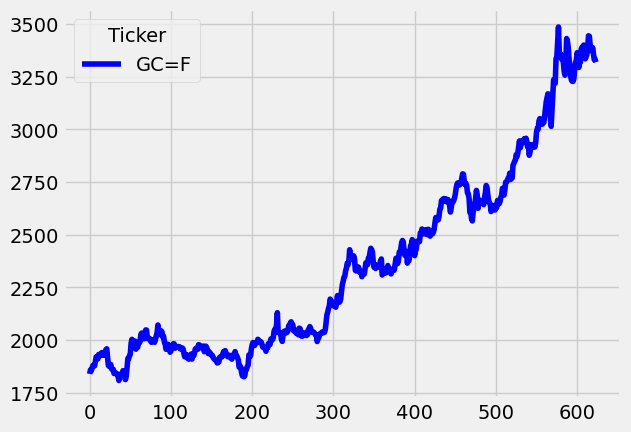

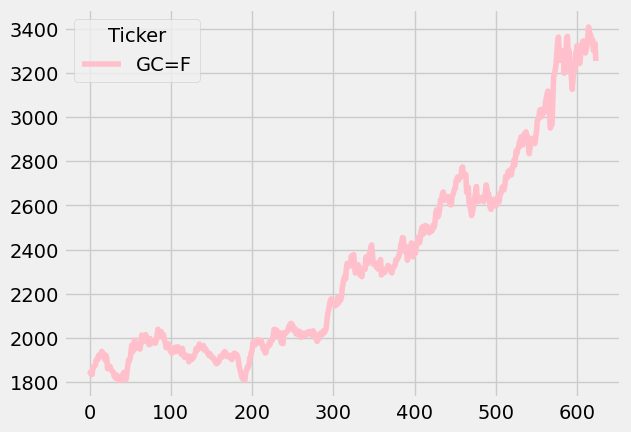

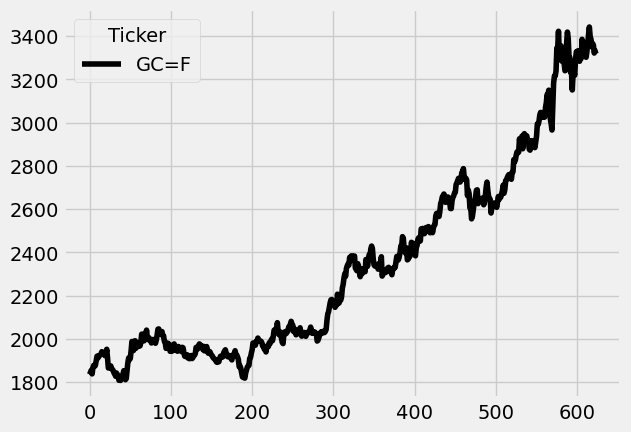

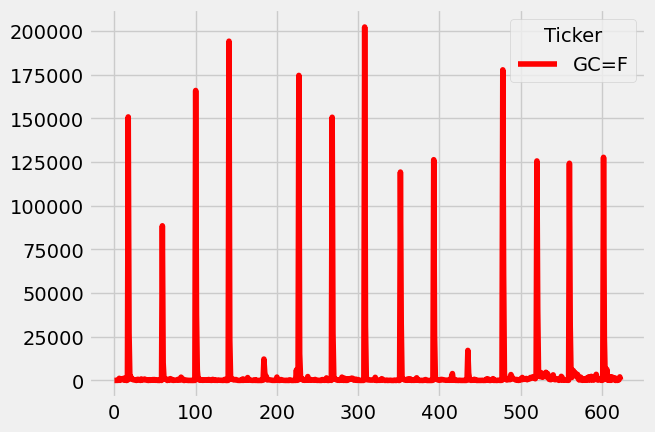

In [124]:
stockprice_one_year  = df ['Close'].plot(c='green')
stockprice_one_year = df ['High'].plot(c='blue')
stockprice_one_year = df ['Low'].plot(c='pink')
stockprice_one_year = df ['Open'].plot(c='black')
stockprice_one_year = df ['Volume'].plot(c='red')
plt.show()

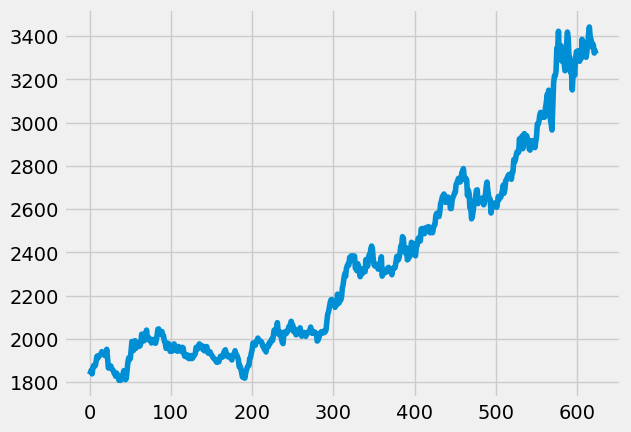

In [125]:
stockprice_one_year = plt.plot(df['Open'])
plt.show()

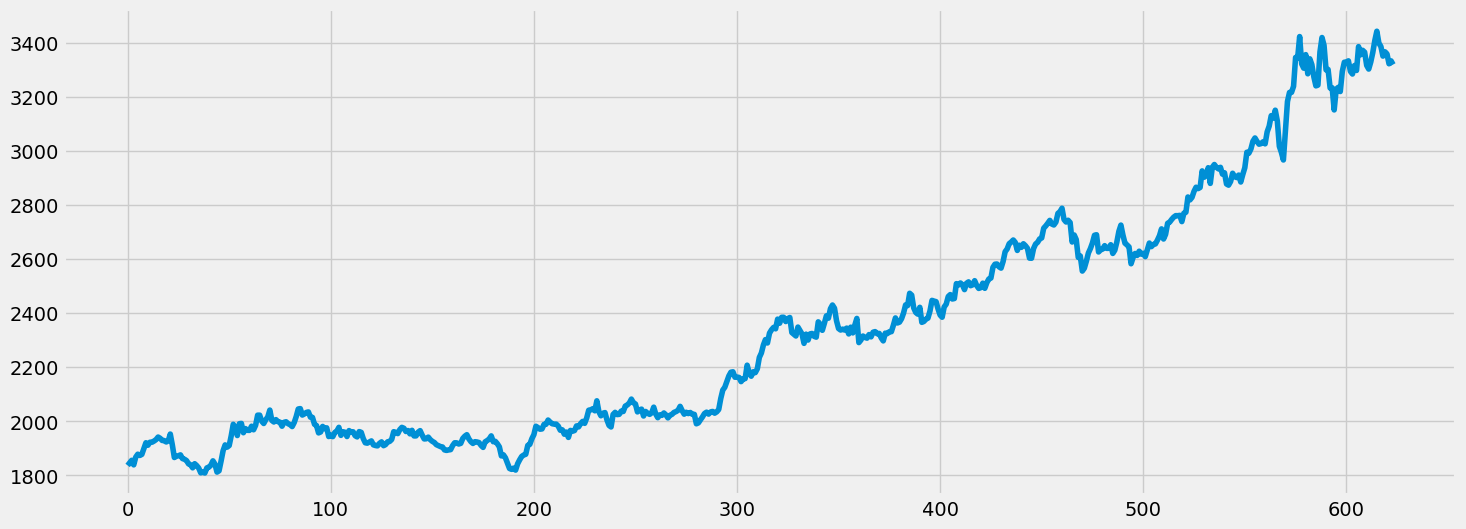

In [126]:
plt.figure(figsize=(16,6))
plt.style.use('fivethirtyeight')
stockprice_one_year = plt.plot(df['Open'])
plt.show()

In [127]:
df.corr()

,Price,Date,Close,High,Low,Open,Volume
,Ticker,,GC=F,GC=F,GC=F,GC=F,GC=F
Price,Ticker,,,,,,
Date,,1.000000,0.933457,0.932240,0.934387,0.932908,0.009564
Close,GC=F,0.933457,1.000000,0.999442,0.999577,0.998842,0.008050
High,GC=F,0.932240,0.999442,1.000000,0.999247,0.999479,0.005186
Low,GC=F,0.934387,0.999577,0.999247,1.000000,0.999386,0.010258
Open,GC=F,0.932908,0.998842,0.999479,0.999386,1.000000,0.007155
Volume,GC=F,0.009564,0.008050,0.005186,0.010258,0.007155,1.000000


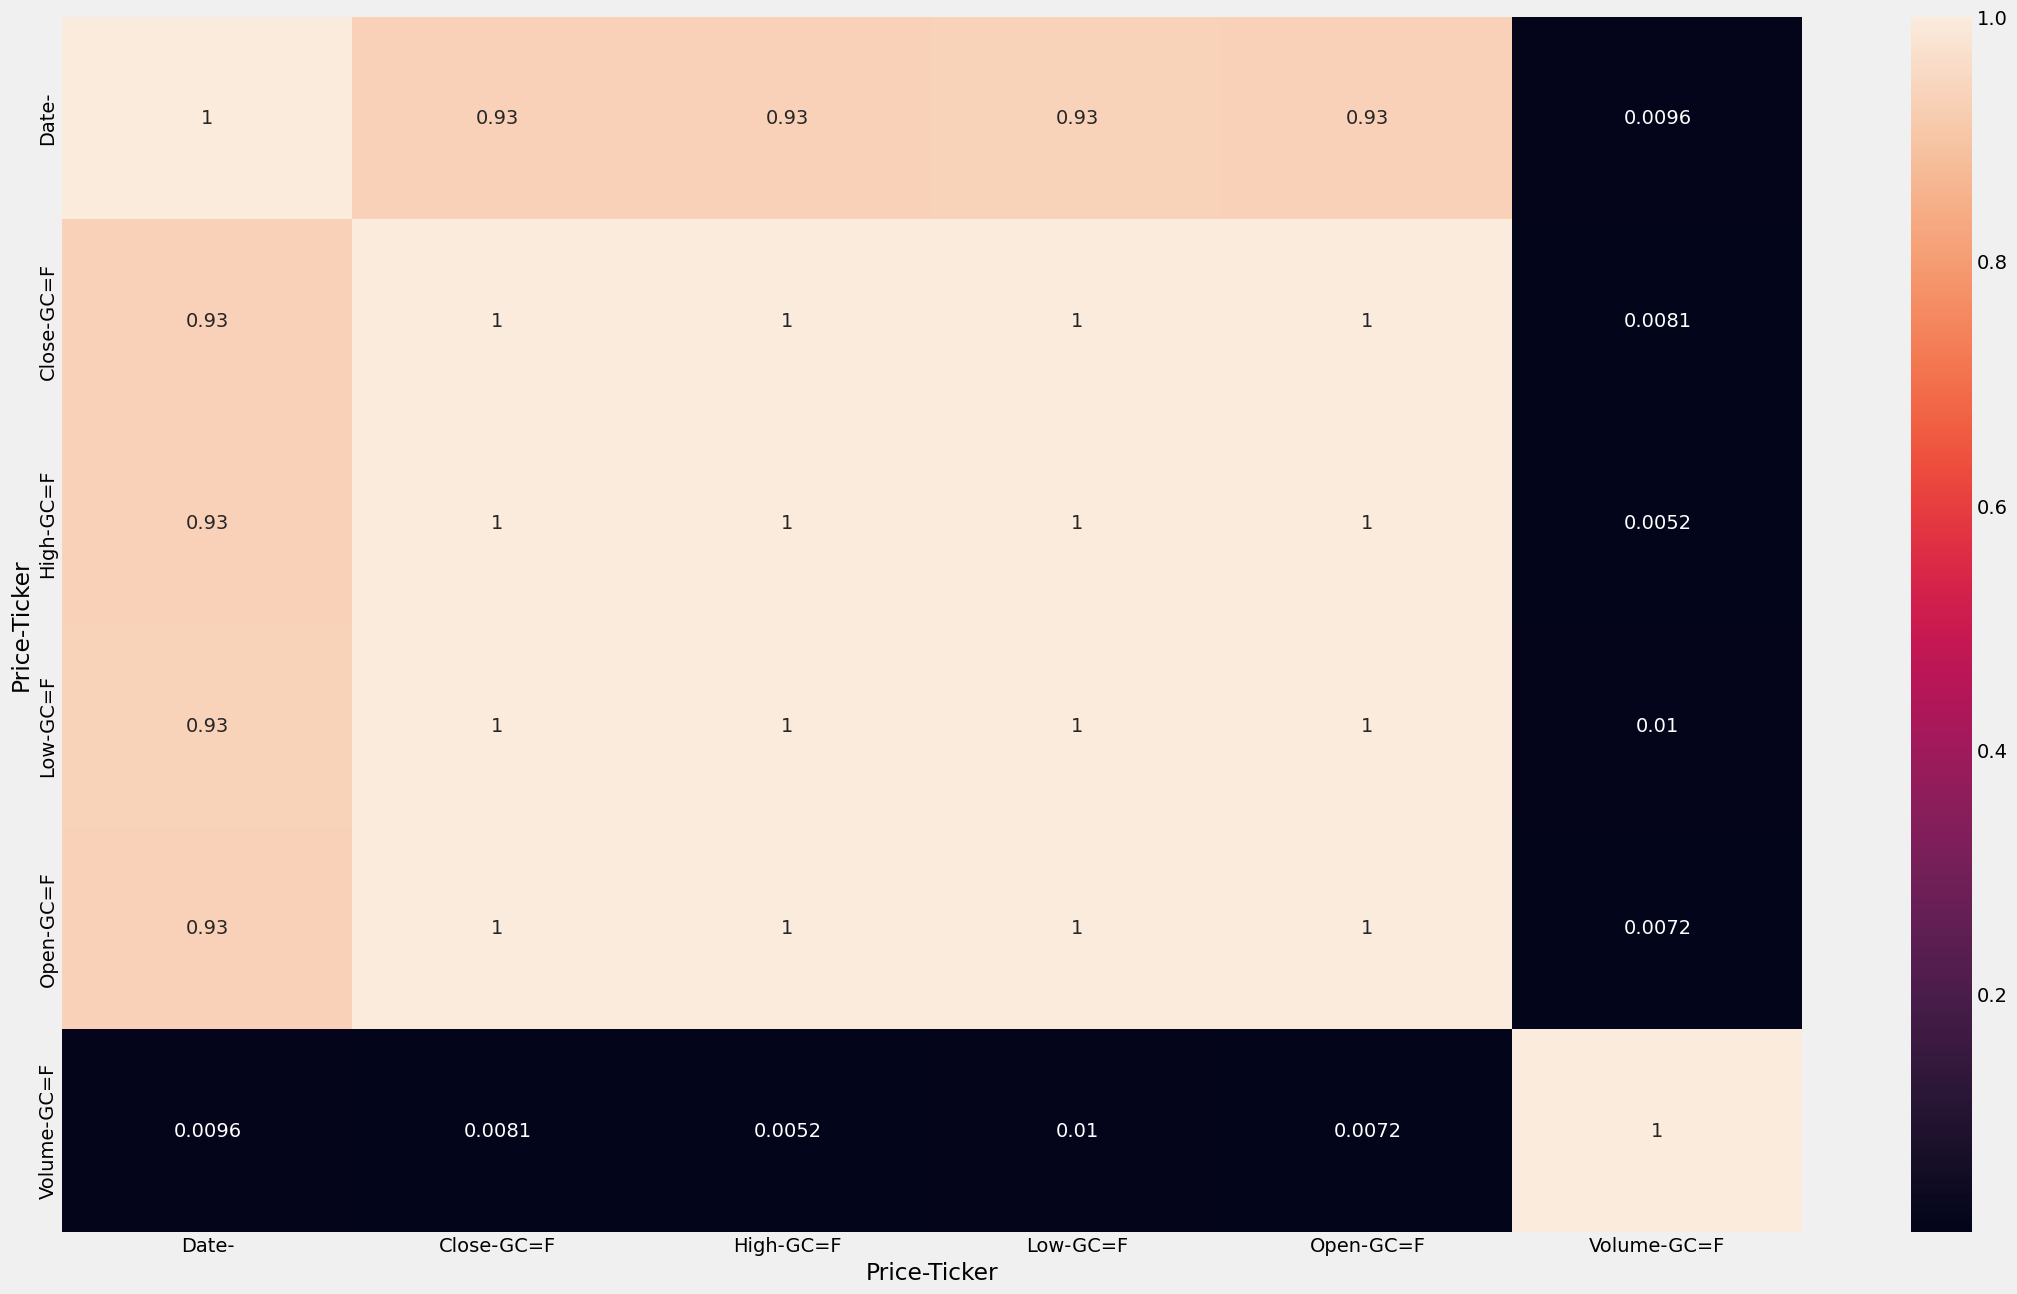

In [128]:
plt.figure(figsize= (25,15))
sns.heatmap(df.corr(method = 'pearson'), annot= True)
plt.show()

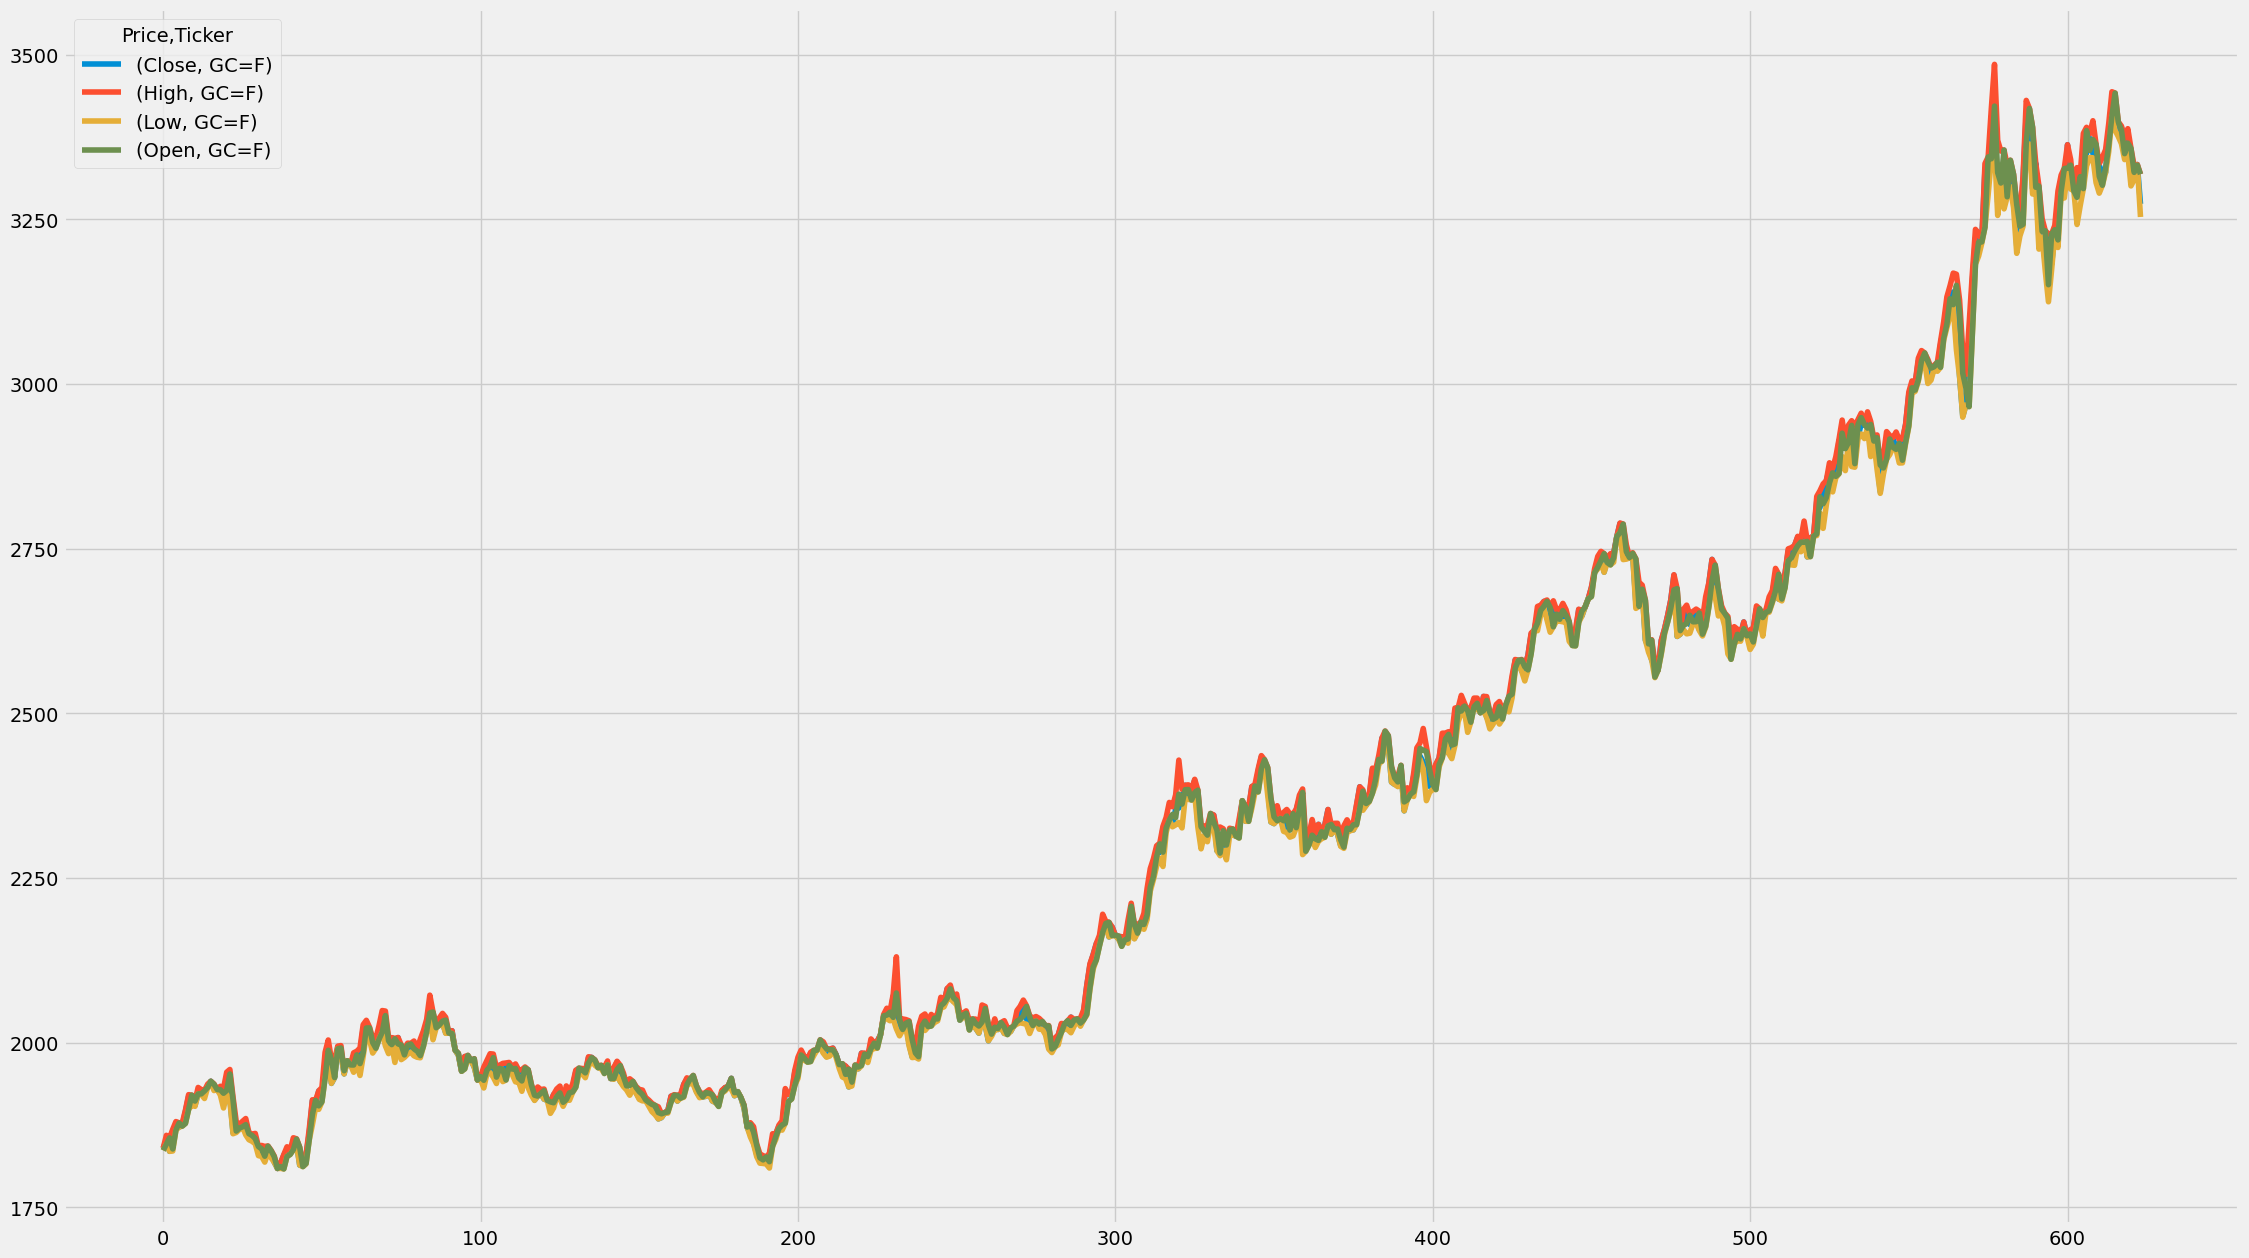

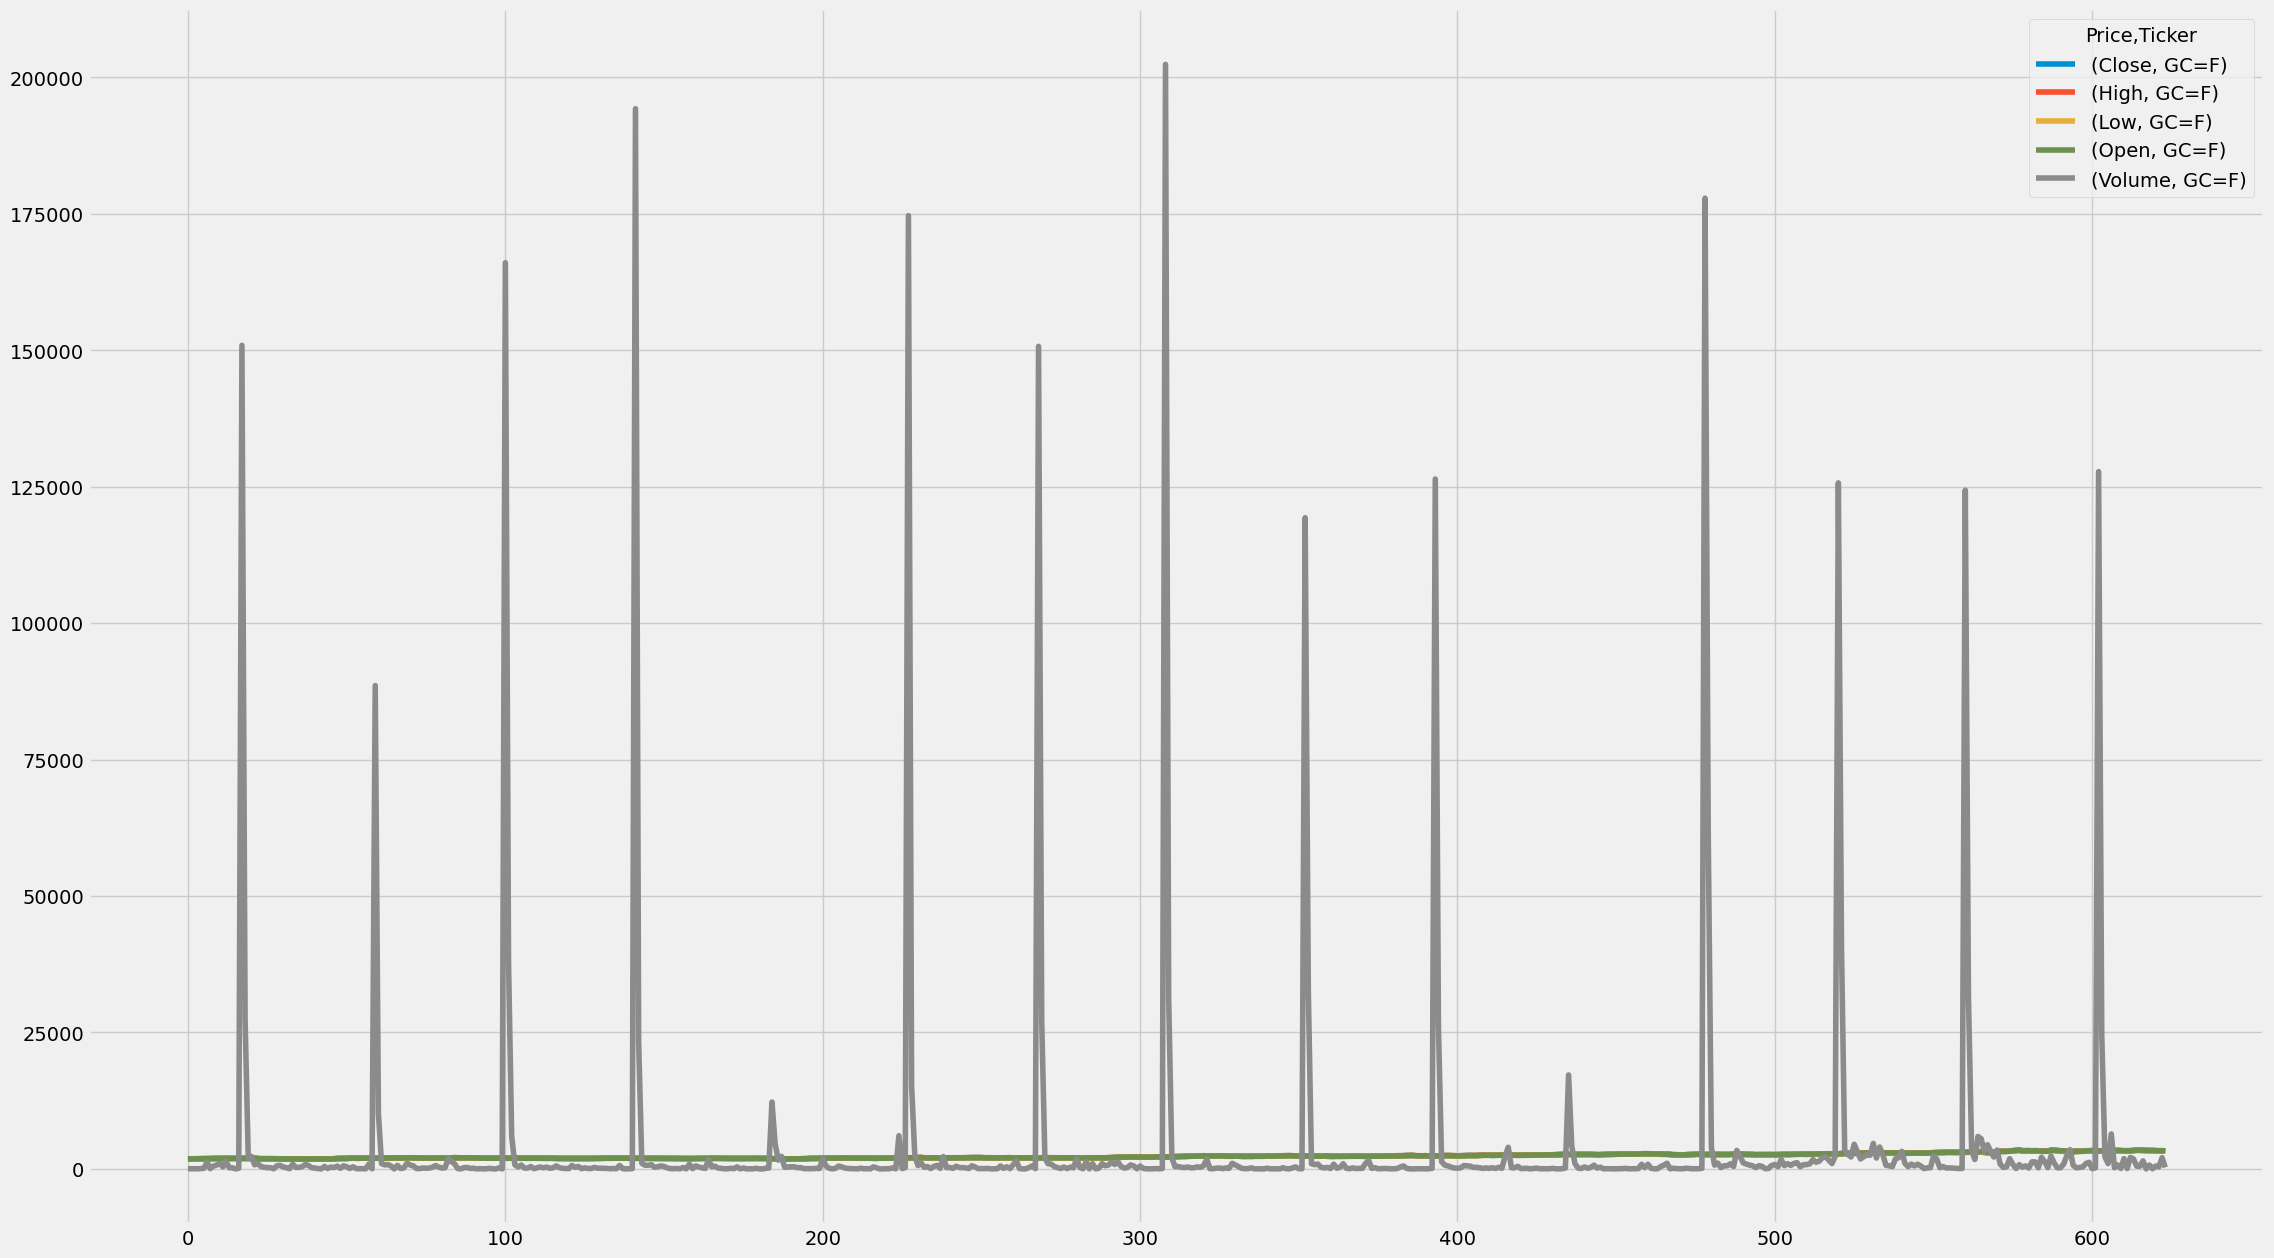

In [129]:
# visualizing multiple features in single plot

stockprice_one_year = df[["Close" ,"High" ,"Low" ,"Open" ]].plot(figsize=(25,15))
plt.show()
stockprice_one_year = df[["Close" ,"High" ,"Low" ,"Open", "Volume" ]].plot(figsize=(25,15))
plt.show()


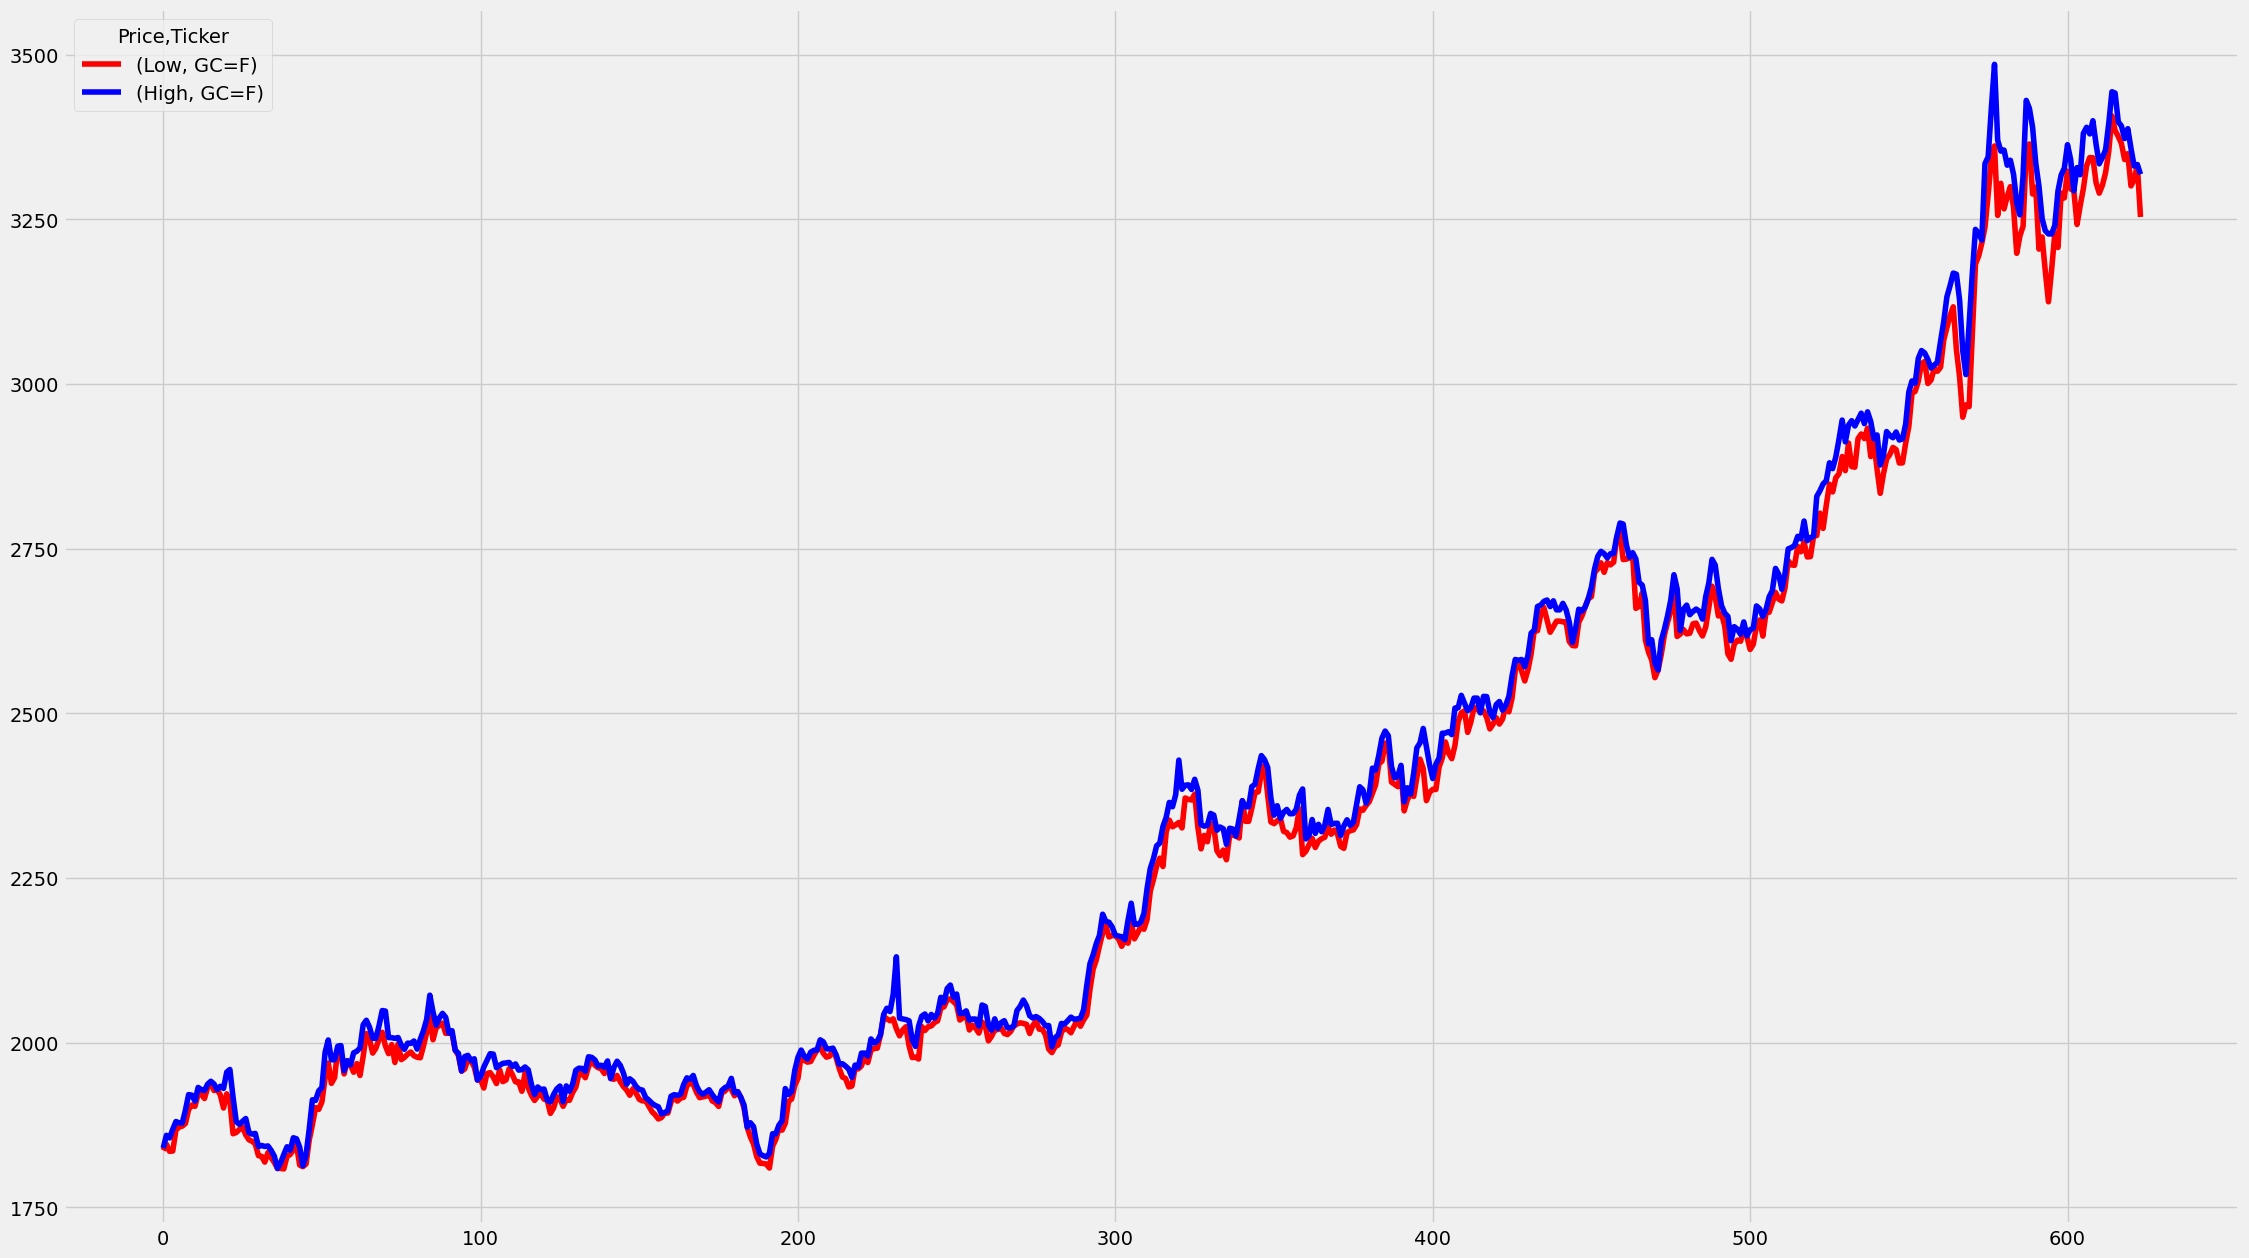

In [130]:
stockprice_one_year = df[["Low" ,"High" ]].plot(color = ['r','b'], figsize=(25,15))
plt.show()

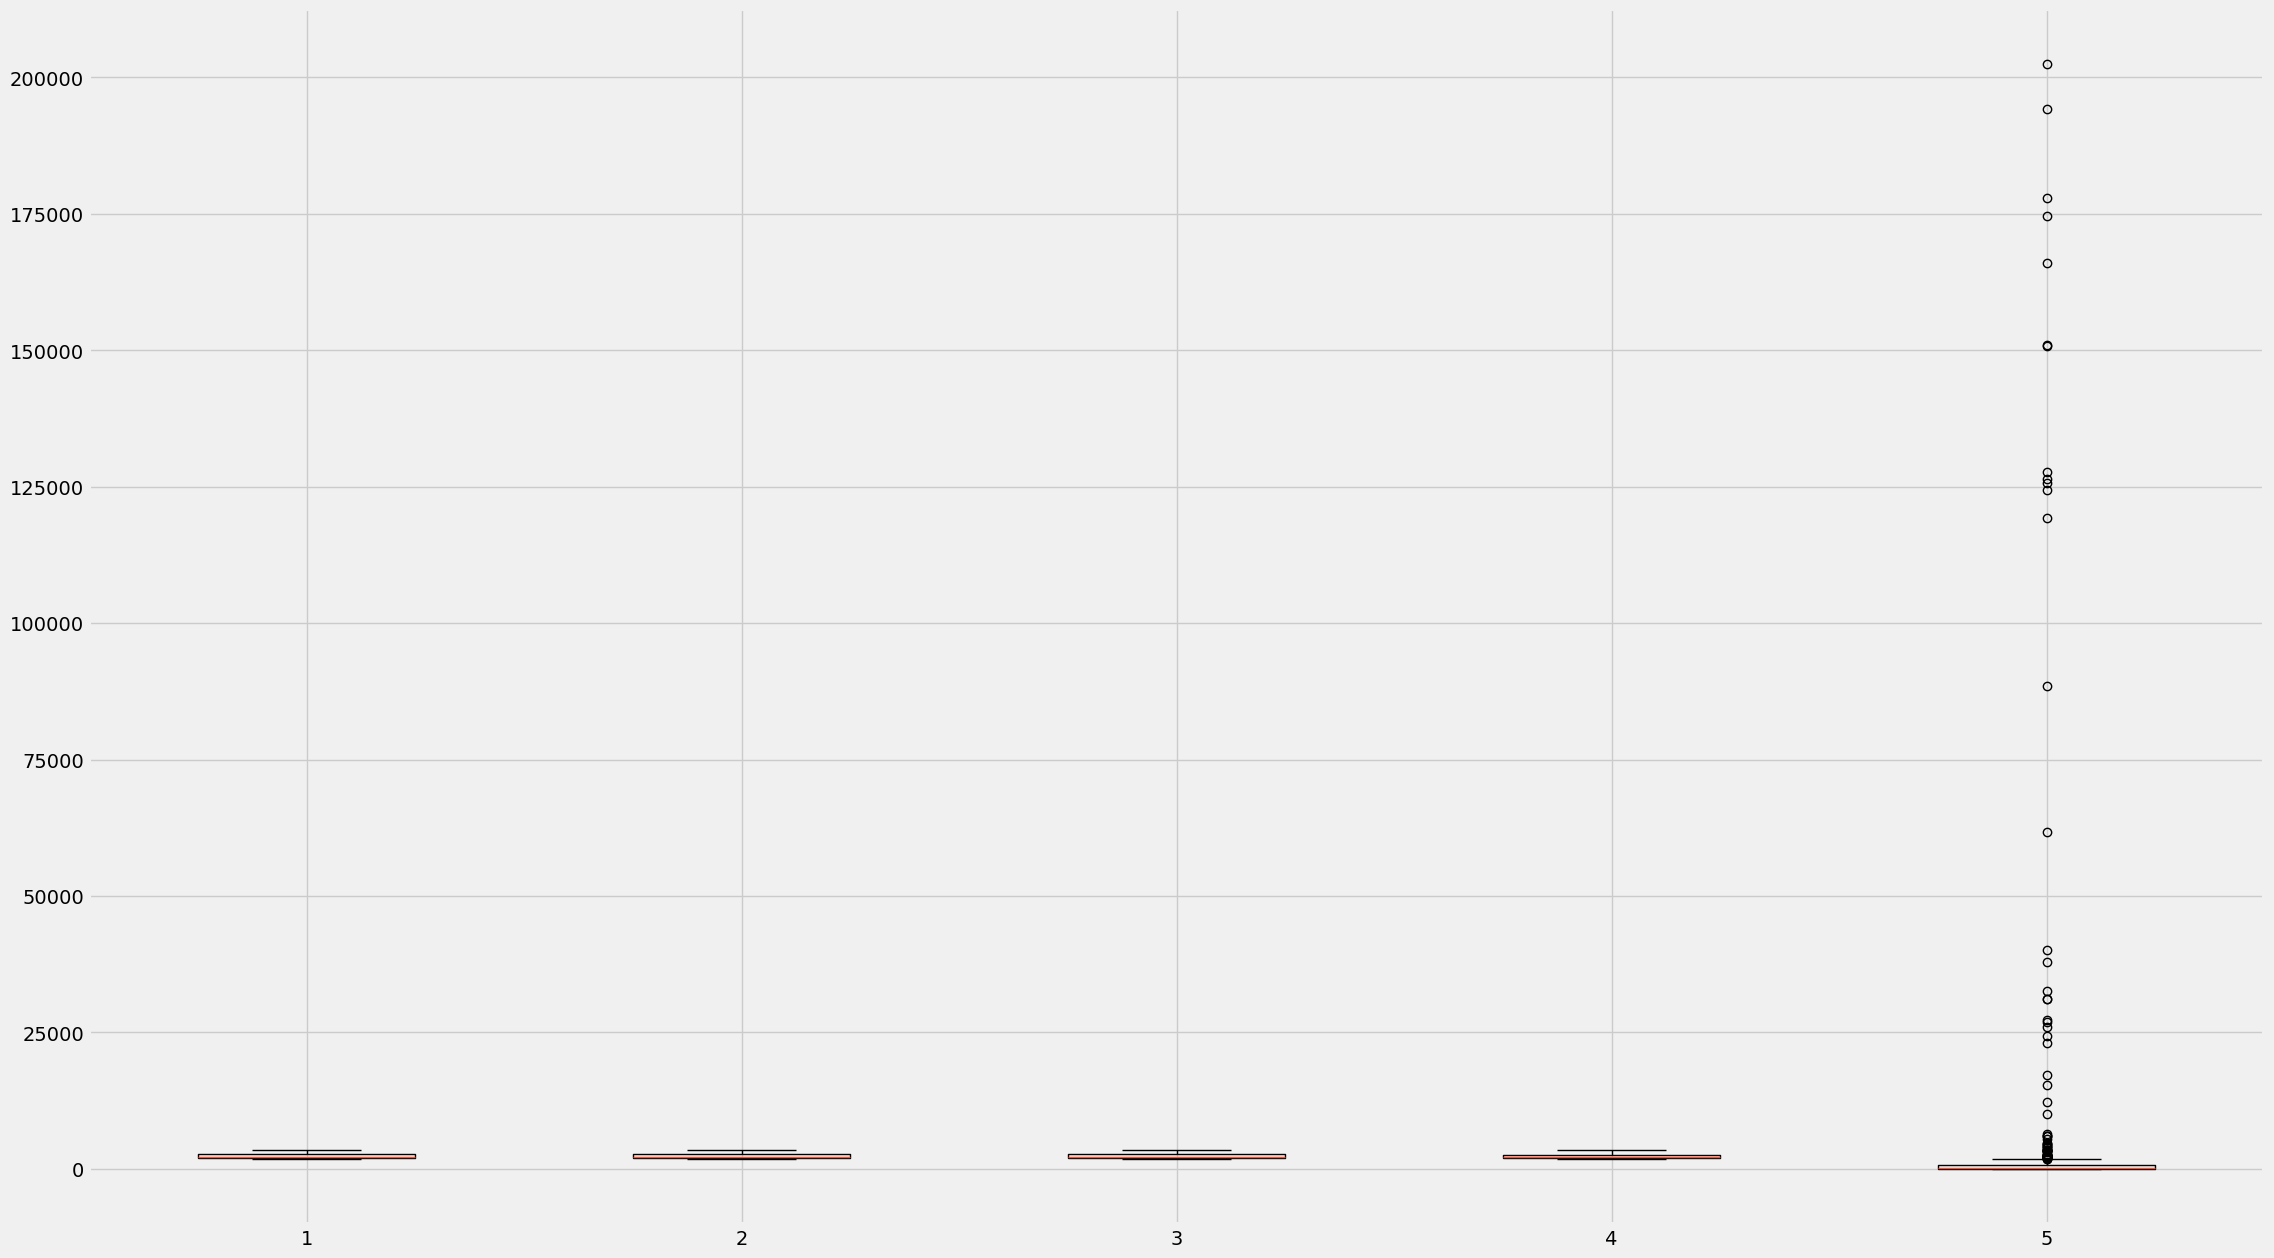

In [131]:
# BoxPlot

plt.figure(figsize=(25,15))
plt.boxplot(df[['Close', 'High', 'Open','Low', 'Volume']])
plt.show()

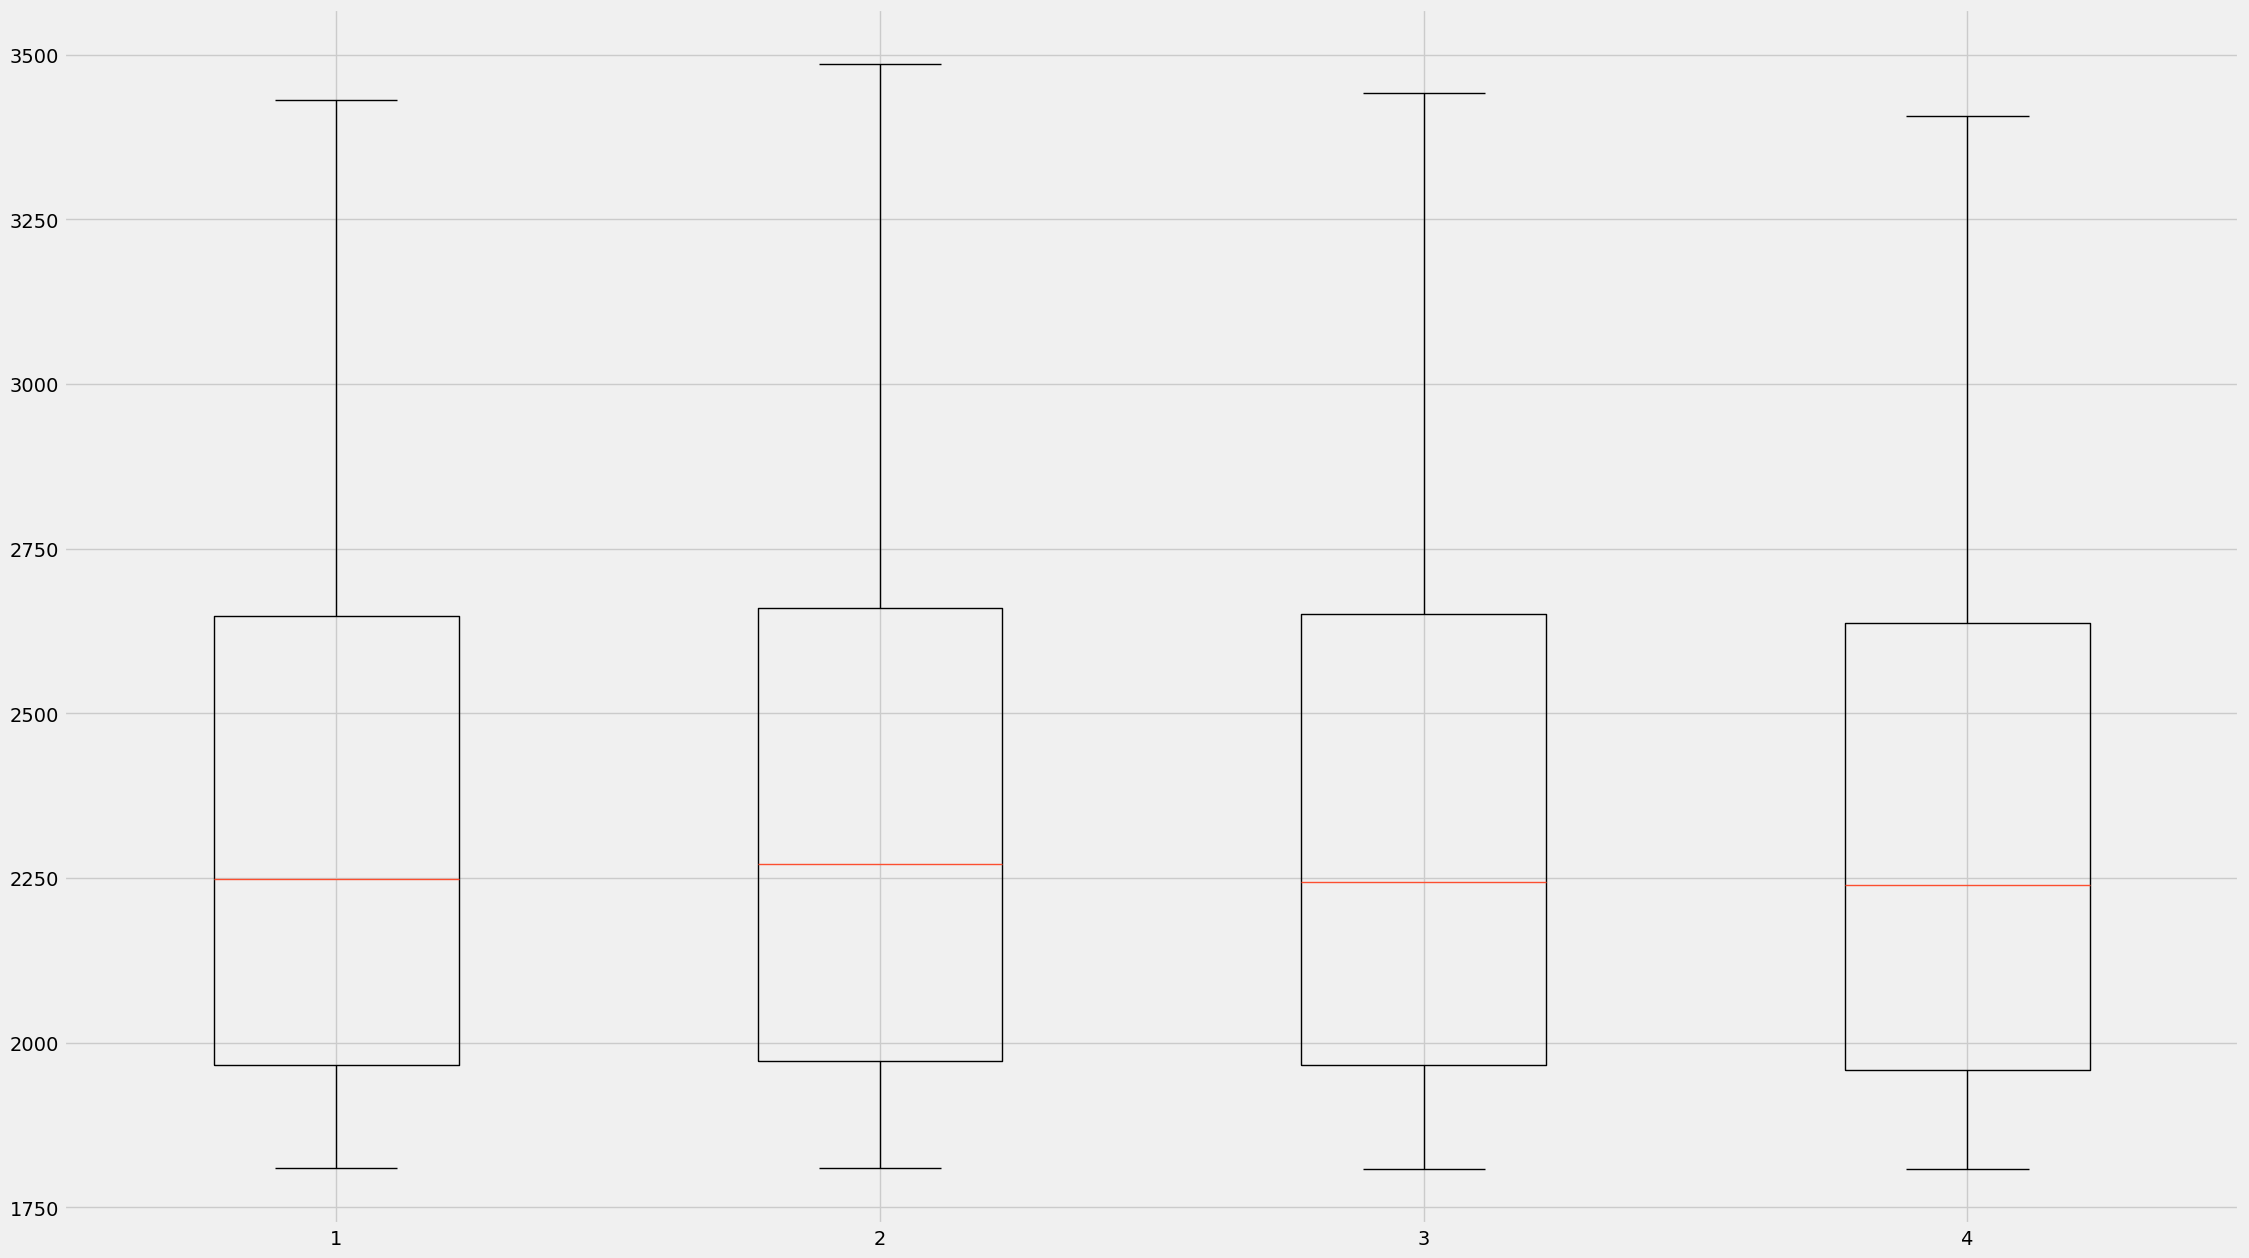

In [132]:
plt.figure(figsize=(25,15))
plt.boxplot(df[['Close', 'High', 'Open','Low',]])
plt.show()

 ## Feature Engineering

In [133]:
#Adding Date in column

# Step 1: Reset index to bring 'Date' as a column
df_reset = df.reset_index()

# Step 2: Flatten the MultiIndex columns (remove 'GC=F' level)
df_reset.columns = df_reset.columns.get_level_values(0)

# Step 3: Select important features including 'Date'
data = df_reset[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Step 4: Set 'Date' as index (optional but useful for time series)
data.set_index('Date', drop=False, inplace=True)

# Optional: Show first few rows
data.head()

Price,Date,Open,High,Low,Close,Volume
Date,,,,,,
2023-01-03,2023-01-03,1836.199951,1839.699951,1836.199951,1839.699951,29
2023-01-04,2023-01-04,1845.599976,1859.099976,1845.599976,1852.800049,25
2023-01-05,2023-01-05,1855.199951,1855.199951,1834.800049,1834.800049,24
2023-01-06,2023-01-06,1838.400024,1868.199951,1835.300049,1864.199951,26
2023-01-09,2023-01-09,1867.000000,1880.000000,1867.000000,1872.699951,62


In [134]:
# 5.1 Generating New Features based on Important features
data = df_reset[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# 5.2 Setting Index as Date
df.set_index("Date", drop=False, inplace=True)

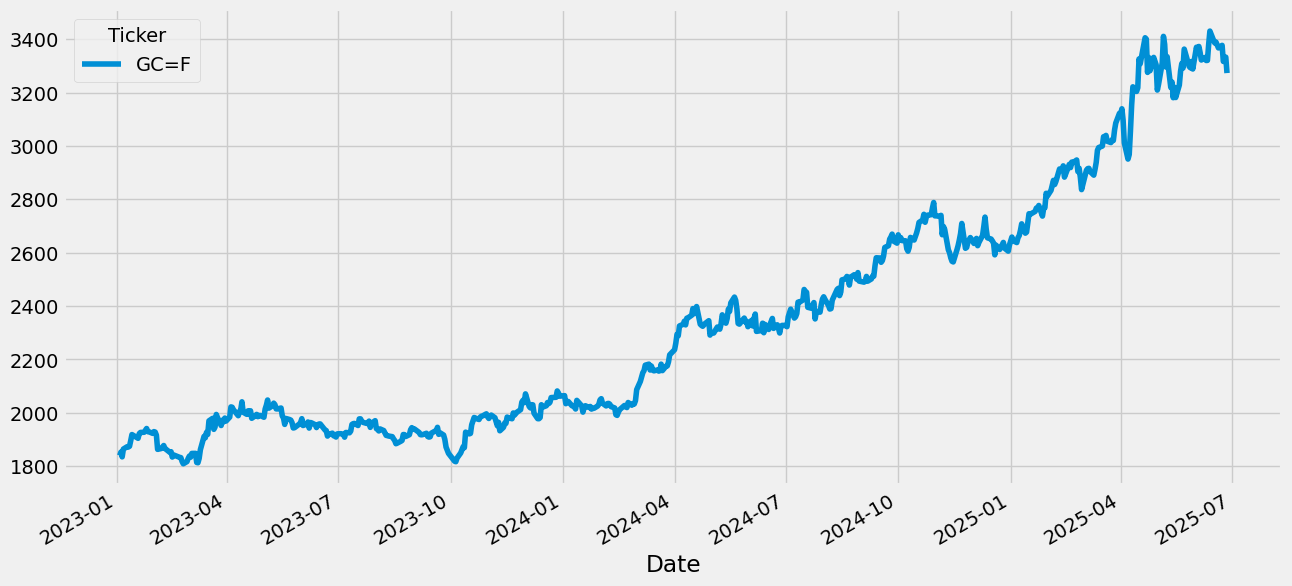

In [135]:
#Visual representation of Closing Price

df.Close.plot(figsize=(14,7))
plt.show()


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    624 non-null    datetime64[ns]
 1   Open    624 non-null    float64       
 2   High    624 non-null    float64       
 3   Low     624 non-null    float64       
 4   Close   624 non-null    float64       
 5   Volume  624 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 29.4 KB


In [137]:
# Generating New features - Lag and window Features for features related to Closing Price

df.reset_index(drop=True, inplace=True)

lag_features = ["Open", "High", "Low", "Volume"]

window1 = 3

window2  = 7

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)

df_rolled_7d = df [lag_features].rolling(window=window2, min_periods=0)

df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:

    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature].astype('float32')

    df[f"(feature)_std_lag{window2}"] = df_std_7d[feature].astype('float32')

In [138]:
# Setting All Null/NaN values of a feature as mean of that feature

df.fillna(df.mean(),inplace=True)

In [139]:
# Setting Date as index and Viewing Dataset

df.set_index("Date",drop= False, inplace= True)
df.head()

Price,Date,Close,High,Low,Open,Volume,Open_mean_lag3,(feature)_std_lag7,High_mean_lag3,Low_mean_lag3,Volume_mean_lag3
Ticker,,GC=F,GC=F,GC=F,GC=F,GC=F,,,,,
Date,,,,,,,,,,,
2023-01-03,2023-01-03,1839.699951,1839.699951,1836.199951,1836.199951,29,2339.951172,NaN,2352.262939,2328.386719,4329.618164
2023-01-04,2023-01-04,1852.800049,1859.099976,1845.599976,1845.599976,25,1836.199951,NaN,1839.699951,1836.199951,29.000000
2023-01-05,2023-01-05,1834.800049,1855.199951,1834.800049,1855.199951,24,1840.899902,NaN,1849.399902,1840.899902,27.000000
2023-01-06,2023-01-06,1864.199951,1868.199951,1835.300049,1838.400024,26,1845.666626,NaN,1851.333252,1838.866699,26.000000
2023-01-09,2023-01-09,1872.699951,1880.000000,1867.000000,1867.000000,62,1846.400024,NaN,1860.833252,1838.566650,25.000000


In [140]:
# Extracting Date Time features from the dataset

df.Date = pd.to_datetime(df.Date, format = "%y-%m-%d")
df["month"] = df.Date.dt.month
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

Price,Date,Close,High,Low,Open,Volume,Open_mean_lag3,(feature)_std_lag7,High_mean_lag3,Low_mean_lag3,Volume_mean_lag3,month,day,day_of_week
Ticker,,GC=F,GC=F,GC=F,GC=F,GC=F,,,,,,,,
Date,,,,,,,,,,,,,,
2023-01-03,2023-01-03,1839.699951,1839.699951,1836.199951,1836.199951,29,2339.951172,NaN,2352.262939,2328.386719,4329.618164,1,3,1
2023-01-04,2023-01-04,1852.800049,1859.099976,1845.599976,1845.599976,25,1836.199951,NaN,1839.699951,1836.199951,29.000000,1,4,2
2023-01-05,2023-01-05,1834.800049,1855.199951,1834.800049,1855.199951,24,1840.899902,NaN,1849.399902,1840.899902,27.000000,1,5,3
2023-01-06,2023-01-06,1864.199951,1868.199951,1835.300049,1838.400024,26,1845.666626,NaN,1851.333252,1838.866699,26.000000,1,6,4
2023-01-09,2023-01-09,1872.699951,1880.000000,1867.000000,1867.000000,62,1846.400024,NaN,1860.833252,1838.566650,25.000000,1,9,0


In [141]:
## Removing unneccesary features

#df = df.drop(columns= ['Symbol'])
#df= df.drop(columns= ['Series'])

## Model Building

In [142]:
#Splitting Dataset into Training and Testing Data

df_train = df[df.Date < "2024"]
df_valid = df[df.Date >= "2024"]

In [143]:
df_valid.shape

(374, 14)

In [144]:
#!pip install keras
import tensorflow
from sklearn.preprocessing import MinMaxScaler

In [145]:
df_train.head().T

,Date,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09
Price,Ticker,,,,,
Date,,2023-01-03 00:00:00,2023-01-04 00:00:00,2023-01-05 00:00:00,2023-01-06 00:00:00,2023-01-09 00:00:00
Close,GC=F,1839.699951,1852.800049,1834.800049,1864.199951,1872.699951
High,GC=F,1839.699951,1859.099976,1855.199951,1868.199951,1880.0
Low,GC=F,1836.199951,1845.599976,1834.800049,1835.300049,1867.0
Open,GC=F,1836.199951,1845.599976,1855.199951,1838.400024,1867.0
Volume,GC=F,29,25,24,26,62
Open_mean_lag3,,2339.951172,1836.199951,1840.899902,1845.666626,1846.400024
(feature)_std_lag7,,NaN,NaN,NaN,NaN,NaN
High_mean_lag3,,2352.262939,1839.699951,1849.399902,1851.333252,1860.833252


In [146]:
## Scaling the Data and Transforming it for Training 

y_train = df_train["Close"]

scaler=MinMaxScaler(feature_range=(0,1))

y_train1=scaler.fit_transform(np.array(df_train['Close']).reshape(-1,1))

y_trainn = df_train["Close"].to_numpy().reshape(-1,1)




In [147]:
y_valid = df_valid["Close"]

scaler1=MinMaxScaler(feature_range=(0,1))

y_valid1=scaler1.fit_transform(np.array(df_valid['Close']).reshape(-1,1))

y_validn = df_valid["Close"].to_numpy().reshape(-1,1)


In [148]:
# Drop the "Close" column
X_train = df_train.drop(columns=["Close"])

# Drop "Date" column for normalization
X_train1 = X_train.drop("Date", axis=1)

# Normalize the remaining features
X_train1 = (X_train1 - X_train1.min()) / (X_train1.max() - X_train1.min())

# Add "Date" column back as the first column
X_train2 = pd.concat([X_train["Date"], X_train1], axis=1)


In [149]:
# Drop the "Close" column
X_valid = df_valid.drop(columns=["Close"])

# Drop the "Date" column for normalization
X_valid1 = X_valid.drop("Date", axis=1)

# Normalize the features
X_valid1 = (X_valid1 - X_valid1.min()) / (X_valid1.max() - X_valid1.min())

# Concatenate "Date" column back as the first column
X_valid2 = pd.concat([X_valid["Date"], X_valid1], axis=1)


In [150]:
X_train3 = X_train2.drop(columns=['Date']).to_numpy()

X_valid3 = X_valid2.drop(columns=['Date']).to_numpy()


In [151]:
y_train1 = y_train1.reshape(-1,1)

y_valid1 = y_valid1.reshape(-1,1)

In [152]:
!pip install xgboost

In [153]:
import xgboost as xgb
import sklearn
from xgboost import XGBRegressor
from xgboost import plot_importance

## Model Training

In [154]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    objective='reg:squarederror'  # explicit objective for older versions
)

# Fit without eval_metric and early_stopping
xgb.fit(X_train3, y_train1)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

<Figure size 1200x800 with 0 Axes>

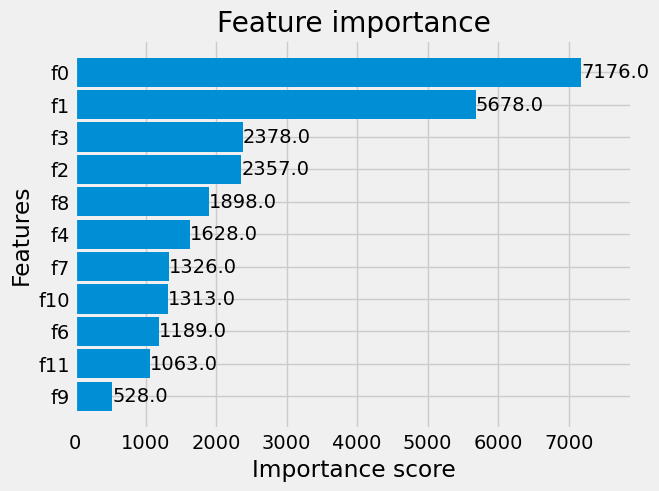

In [155]:
plt.figure(figsize= (12,8))
feature_importance = plot_importance(xgb, height=0.9)
feature_importance
plt.show()

In [156]:
predicted_results_v = xgb.predict(X_valid3)

predicted_results_t = xgb.predict(X_train3)

predicted_results_v= predicted_results_v.reshape(-1, 1)

predicted_results_t= predicted_results_t.reshape(-1, 1)

predicted_results_v = scaler1.inverse_transform(predicted_results_v)

predicted_results_t = scaler.inverse_transform(predicted_results_t)


In [157]:
from sklearn.metrics import r2_score, mean_squared_error

# Reverse-transform actual values (if not already done)
y_valid_inv = scaler1.inverse_transform(y_valid1.reshape(-1, 1))
y_train_inv = scaler.inverse_transform(y_train1.reshape(-1, 1))

# Evaluate performance
r2_valid = r2_score(y_valid_inv, predicted_results_v)
rmse_valid = mean_squared_error(y_valid_inv, predicted_results_v, squared=False)

r2_train = r2_score(y_train_inv, predicted_results_t)
rmse_train = mean_squared_error(y_train_inv, predicted_results_t, squared=False)

print(f"Validation R²: {r2_valid:.4f}")
print(f"Validation RMSE: {rmse_valid:.4f}")
print(f"Train R²: {r2_train:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")


Validation R²: 0.9836
Validation RMSE: 50.3702
Train R²: 1.0000
Train RMSE: 0.3446


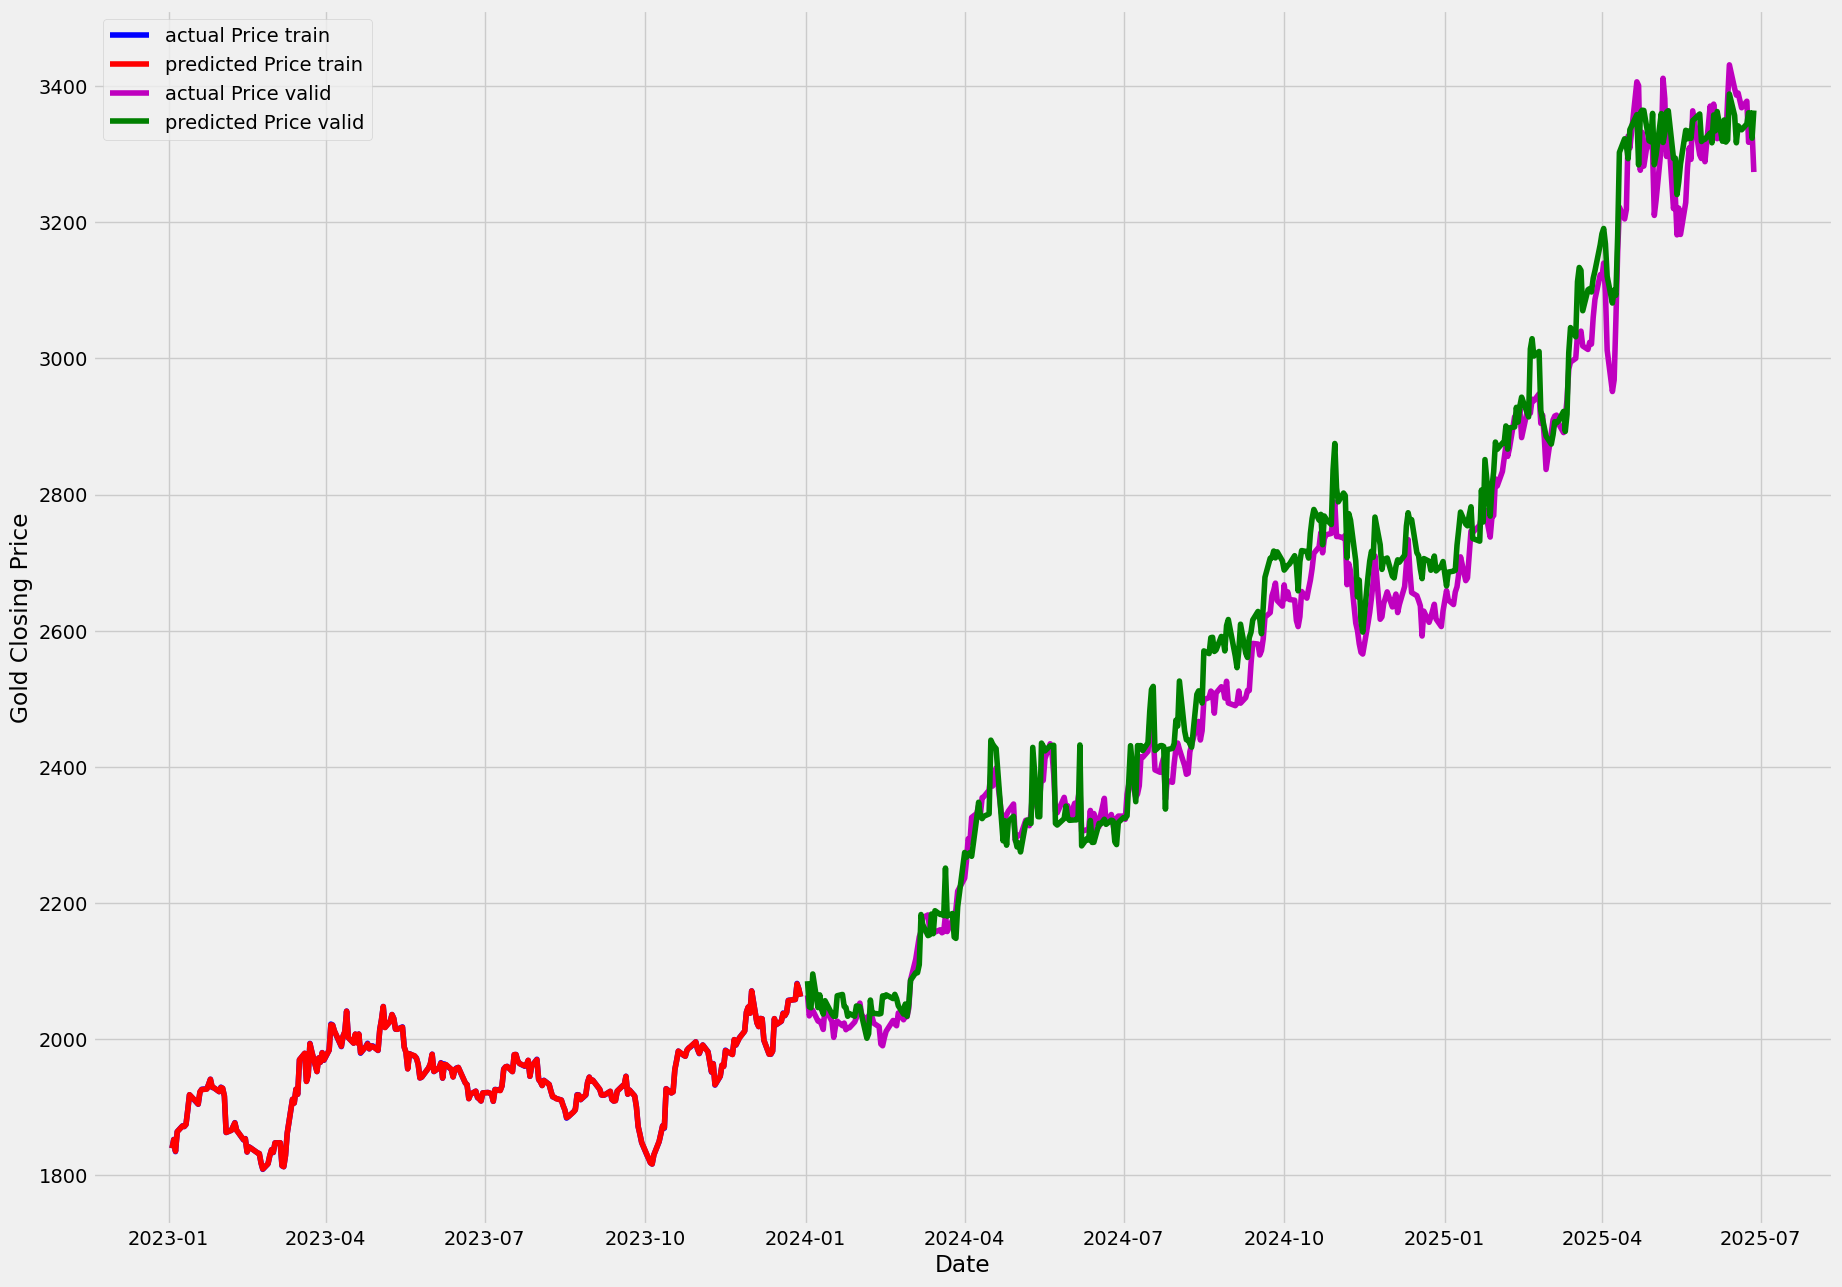

In [158]:
plt.figure(figsize=(20,15))

plt.plot(X_train2.index, list(y_trainn), label="actual Price train", color='b')

plt.plot(X_train2.index, list(predicted_results_t), label="predicted Price train", color='r')

plt.plot(X_valid2.index, list(y_validn), label="actual Price valid",color='m')

plt.plot(X_valid2.index, list(predicted_results_v), label="predicted Price valid",color='g')


plt.xlabel('Date')

plt.ylabel('Gold Closing Price')

plt.legend()

plt.show()

In [160]:
train_df = pd.DataFrame({
    'Date': X_train2.index,
    'Actual Price': y_trainn_np.ravel(),
    'Predicted Price': predicted_results_t.ravel(),
    'Set': ['Train'] * len(y_trainn_np)
})

valid_df = pd.DataFrame({
    'Date': X_valid2.index,
    'Actual Price': y_validn_np.ravel(),
    'Predicted Price': predicted_results_v.ravel(),
    'Set': ['Validation'] * len(y_validn_np)
})

# Combine and print
final_df = pd.concat([train_df, valid_df]).reset_index(drop=True)

print("\nFinal Actual vs Predicted Gold Prices (used in graph):\n")
print(final_df.to_string(index=False))



Final Actual vs Predicted Gold Prices (used in graph):

      Date  Actual Price  Predicted Price        Set
2023-01-03   1839.699951      1839.850586      Train
2023-01-04   1852.800049      1852.446289      Train
2023-01-05   1834.800049      1835.444336      Train
2023-01-06   1864.199951      1864.051270      Train
2023-01-09   1872.699951      1872.342773      Train
2023-01-10   1871.599976      1871.860596      Train
2023-01-11   1874.599976      1874.654907      Train
2023-01-12   1895.500000      1895.376953      Train
2023-01-13   1918.400024      1918.405884      Train
2023-01-17   1907.199951      1907.916260      Train
2023-01-18   1904.400024      1904.664307      Train
2023-01-19   1922.099976      1922.763428      Train
2023-01-20   1926.400024      1925.952026      Train
2023-01-23   1927.099976      1926.732056      Train
2023-01-24   1933.900024      1933.750122      Train
2023-01-25   1941.199951      1941.046387      Train
2023-01-26   1929.099976      1929.757080 

## Predicts gold prices for the next 30 days

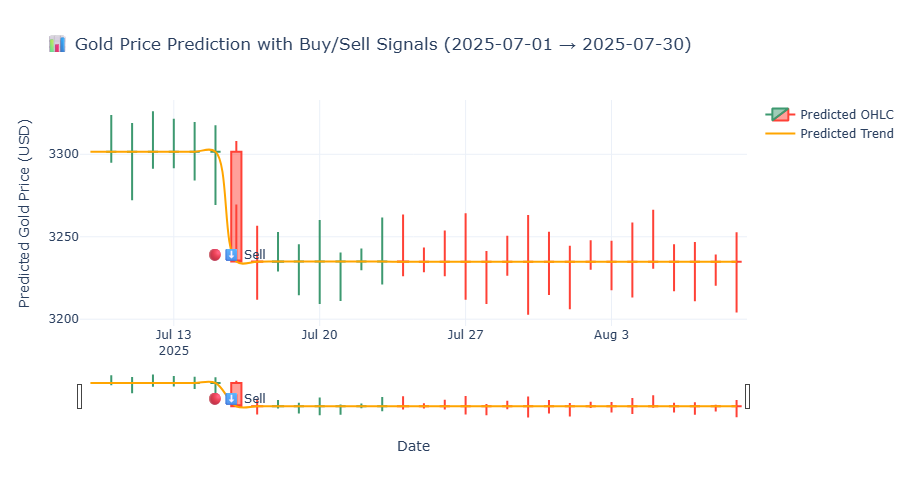

In [169]:
fig = go.Figure()

# Candlestick chart
fig.add_trace(go.Candlestick(
    x=future_df['Date'],
    open=future_df['Open'],
    high=future_df['High'],
    low=future_df['Low'],
    close=future_df['Close'],
    name='Predicted OHLC'
))

# Predicted close price trend line
fig.add_trace(go.Scatter(
    x=future_df['Date'],
    y=future_df['Predicted_Close'],
    mode='lines',
    name='Predicted Trend',
    line=dict(color='orange', shape='spline', width=2)
))

# Buy/Sell markers
for i, row in future_df.iterrows():
    if row['Signal'] == 'Buy':
        fig.add_trace(go.Scatter(
            x=[row['Date']],
            y=[row['Predicted_Close']],
            mode='text',
            text=["🟢⬆️ Buy"],
            textposition="bottom center",
            showlegend=False
        ))
    elif row['Signal'] == 'Sell':
        fig.add_trace(go.Scatter(
            x=[row['Date']],
            y=[row['Predicted_Close']],
            mode='text',
            text=["🔴⬇️ Sell"],
            textposition="top center",
            showlegend=False
        ))

fig.update_layout(
    title=f"📊 Gold Price Prediction with Buy/Sell Signals\n({start_datetime.date()} → {end_datetime.date()})",
    xaxis_title="Date",
    yaxis_title="Predicted Gold Price (USD)",
    width=1500,
    height=500,
    template="plotly_white",
    hovermode='x unified'
)

fig.show()


In [190]:
# Basic summary DataFrame
summary_df = future_df[['Date', 'Open', 'High', 'Low', 'Close', 'Predicted_Close']].copy()

# Optional: Clean NaN signals for better readability
#summary_df['Signal'] = summary_df['Signal'].fillna('Hold')

# Print a nice table (you can also write to CSV if needed)
print("\n📈 Gold Price Prediction Summary:\n")
print(summary_df.to_string(index=False))


📈 Gold Price Prediction Summary:

      Date                                               Open                                               High                                                Low       Close  Predicted_Close
2025-07-09 Ticker
GC=F    3273.699951
Name: 59, dtype: object Ticker
GC=F    3286.554625
Name: 59, dtype: object Ticker
GC=F    3262.459557
Name: 59, dtype: object 3301.573486      3301.570068
2025-07-10                                        3301.573486                                        3323.819545                                        3294.920534 3301.573486      3301.570068
2025-07-11                                        3301.573486                                         3318.90653                                        3272.111394 3301.573486      3301.570068
2025-07-12                                        3301.573486                                        3326.068531                                        3291.163841 3301.573486      3301.570068


In [185]:
# Create a clean copy of the summary DataFrame
summary_df = future_df[['Date', 'Open', 'High', 'Low', 'Close', 'Predicted_Close']].copy()

# Ensure numeric values are actually numeric
float_cols = ['Open', 'High', 'Low', 'Close', 'Predicted_Close']
for col in float_cols:
    summary_df[col] = pd.to_numeric(summary_df[col], errors='coerce')
    summary_df[col] = summary_df[col].apply(lambda x: f"{x:>10,.2f}" if pd.notnull(x) else "     N/A")

# Convert date column to string and pad for alignment
summary_df['Date'] = summary_df['Date'].astype(str).str.ljust(15)

# Create column headers with spacing
headers = ["Date".ljust(15), "Open".rjust(12), "High".rjust(12), "Low".rjust(12),
           "Close".rjust(12), "Predicted".rjust(15)]

# Print the header
print("\n" + "=" * 85)
print("📈 GOLD PRICE PREDICTION SUMMARY".center(85))
print("=" * 85)
print("  ".join(headers))
print("-" * 85)

# Print each row manually with good spacing
for idx, row in summary_df.iterrows():
    print(f"{row['Date']}  {row['Open']}  {row['High']}  {row['Low']}  {row['Close']}  {row['Predicted_Close']}")

print("=" * 85 + "\n")



                           📈 GOLD PRICE PREDICTION SUMMARY                           
Date                     Open          High           Low         Close        Predicted
-------------------------------------------------------------------------------------
2025-07-09            N/A       N/A       N/A    3,301.57    3,301.57
2025-07-10         3,301.57    3,323.82    3,294.92    3,301.57    3,301.57
2025-07-11         3,301.57    3,318.91    3,272.11    3,301.57    3,301.57
2025-07-12         3,301.57    3,326.07    3,291.16    3,301.57    3,301.57
2025-07-13         3,301.57    3,321.55    3,291.47    3,301.57    3,301.57
2025-07-14         3,301.57    3,319.55    3,284.09    3,301.57    3,301.57
2025-07-15         3,301.57    3,317.58    3,269.31    3,301.57    3,301.57
2025-07-16         3,301.57    3,308.08    3,269.49    3,234.95    3,234.95
2025-07-17         3,234.95    3,256.71    3,211.75    3,234.88    3,234.88
2025-07-18         3,234.88    3,252.92    3,228.95    3,234

In [172]:
buy_signals = future_df[future_df['Signal'] == 'Buy']
sell_signals = future_df[future_df['Signal'] == 'Sell']

summary_stats = {
    'Total Days': len(future_df),
    'Total Buy Signals': len(buy_signals),
    'Total Sell Signals': len(sell_signals),
    'First Predicted Price': future_df['Predicted_Close'].iloc[0],
    'Last Predicted Price': future_df['Predicted_Close'].iloc[-1],
    'Predicted Price Change': future_df['Predicted_Close'].iloc[-1] - future_df['Predicted_Close'].iloc[0],
    'Predicted % Change': ((future_df['Predicted_Close'].iloc[-1] - future_df['Predicted_Close'].iloc[0]) / future_df['Predicted_Close'].iloc[0]) * 100
}

print("\n📋 Summary Statistics:\n")
for k, v in summary_stats.items():
    print(f"{k}: {v:.2f}" if isinstance(v, (float, int)) else f"{k}: {v}")



📋 Summary Statistics:

Total Days: 32.00
Total Buy Signals: 0.00
Total Sell Signals: 1.00
First Predicted Price: 3301.570068359375
Last Predicted Price: 3234.8798828125
Predicted Price Change: -66.690185546875
Predicted % Change: -2.02


## Optimize of view 

Date,Predicted_Close,Change_%,Signal
2025-07-09 00:00:00,3301.57,+nan%,
2025-07-10 00:00:00,3301.57,+0.00%,
2025-07-11 00:00:00,3301.57,+0.00%,
2025-07-12 00:00:00,3301.57,+0.00%,
2025-07-13 00:00:00,3301.57,+0.00%,
2025-07-14 00:00:00,3301.57,+0.00%,
2025-07-15 00:00:00,3301.57,+0.00%,
2025-07-16 00:00:00,3234.95,-2.02%,Sell
2025-07-17 00:00:00,3234.88,-0.00%,
2025-07-18 00:00:00,3234.95,+0.00%,


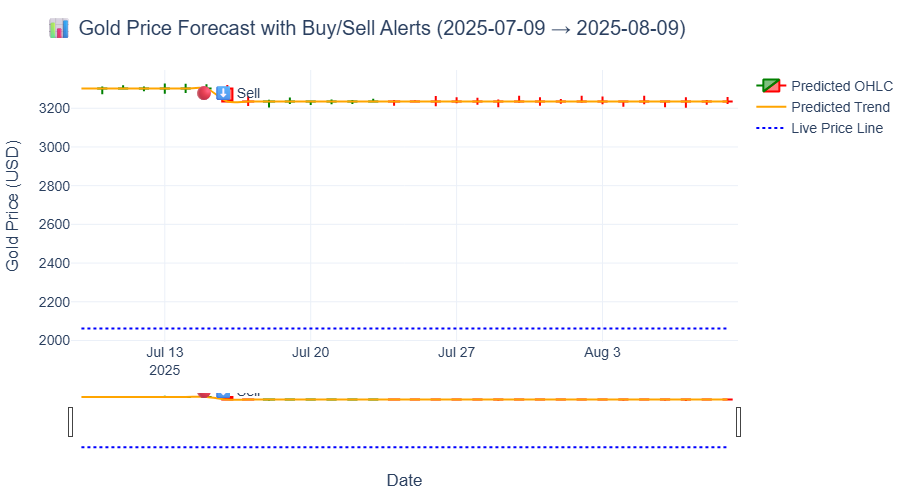

In [191]:
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from IPython.display import display, HTML

# Prediction date range
start_date = pd.to_datetime("2025-07-09")
end_date = pd.to_datetime("2025-08-09")
n_days = (end_date - start_date).days + 1

# Prepare data
df_future = df.copy().reset_index(drop=True)
df_recent = df_future[-60:].copy().reset_index(drop=True)

# Predict future data
future_data = []
next_date = start_date

for _ in range(n_days):
    last_row = df_recent.iloc[-1]

    new_row = {
        'Date': next_date,
        'Open': last_row['Close'],
        'High': last_row['Close'] * np.random.uniform(1.001, 1.01),
        'Low': last_row['Close'] * np.random.uniform(0.99, 0.999),
        'Volume': last_row['Volume'],
        'Close': last_row['Close']  # placeholder
    }

    temp_df = pd.concat([df_recent, pd.DataFrame([new_row])], ignore_index=True)

    for col in ['Open', 'High', 'Low', 'Volume']:
        temp_df[f'{col}_mean_lag3'] = temp_df[col].rolling(window=3).mean().shift(1)
        temp_df[f'{col}_std_lag7'] = temp_df[col].rolling(window=7).std().shift(1)

    feature_cols = [
        'Open_mean_lag3', 'High_mean_lag3', 'Low_mean_lag3', 'Volume_mean_lag3',
        'Open_std_lag7', 'High_std_lag7', 'Low_std_lag7', 'Volume_std_lag7',
        'Open', 'High', 'Low', 'Volume'
    ]

    input_features = temp_df[feature_cols].iloc[-1].values.reshape(1, -1)
    input_features = np.nan_to_num(input_features)

    scaled_prediction = xgb.predict(input_features)
    prediction = scaler1.inverse_transform(scaled_prediction.reshape(-1, 1))[0][0]

    new_row['Close'] = prediction
    new_row['Predicted_Close'] = prediction

    df_recent = pd.concat([df_recent, pd.DataFrame([new_row])], ignore_index=True)
    future_data.append(new_row)

    next_date += timedelta(days=1)

#  Final DataFrame
future_df = pd.DataFrame(future_data)

# Trend and Signal logic with advance alerts every 2 days
future_df['Trend'] = future_df['Predicted_Close'].diff()
future_df['Raw_Signal'] = future_df['Trend'].apply(lambda x: 'Buy' if x > 0 else ('Sell' if x < 0 else ''))

# Mark signal every 2 days in advance
future_df['Signal'] = ''
for i in range(2, len(future_df), 2):
    future_trend = future_df.loc[i, 'Raw_Signal']
    if future_trend == 'Buy':
        future_df.loc[i - 1, 'Signal'] = 'Buy'
    elif future_trend == 'Sell':
        future_df.loc[i - 1, 'Signal'] = 'Sell'

# Clean signal noise (optional)
future_df['Predicted_Close'] = future_df['Predicted_Close'].round(2)
future_df['Change_%'] = future_df['Predicted_Close'].pct_change() * 100

# 📋 Styled Summary Table
styled_df = future_df[['Date', 'Predicted_Close', 'Change_%', 'Signal']].copy().reset_index(drop=True)
styled_df_html = styled_df.style.format({
    "Predicted_Close": "{:.2f}",
    "Change_%": "{:+.2f}%"
}).background_gradient(subset='Change_%', cmap='RdYlGn').set_properties(**{
    'text-align': 'center',
    'font-size': '12pt',
    'border': '1px solid lightgray'
}).hide(axis="index").to_html()

display(HTML(styled_df_html))

#  Plotting with enhanced visuals
fig = go.Figure()

# 🕯️ Candlestick chart
fig.add_trace(go.Candlestick(
    x=future_df['Date'],
    open=future_df['Open'],
    high=future_df['High'],
    low=future_df['Low'],
    close=future_df['Close'],
    name='Predicted OHLC',
    increasing_line_color='green',
    decreasing_line_color='red'
))

#  Predicted Trend line
fig.add_trace(go.Scatter(
    x=future_df['Date'],
    y=future_df['Predicted_Close'],
    mode='lines',
    name='Predicted Trend',
    line=dict(color='orange', shape='spline', width=2)
))

# Live price line
current_price = float(scaler.inverse_transform(np.array(y_train1[-1]).reshape(1, -1))[0][0])
fig.add_trace(go.Scatter(
    x=future_df['Date'],
    y=[current_price] * len(future_df),
    mode='lines',
    name='Live Price Line',
    line=dict(color='blue', dash='dot', width=2)
))

# Buy/Sell markers
for i, row in future_df.iterrows():
    if row['Signal'] == 'Buy':
        fig.add_trace(go.Scatter(
            x=[row['Date']],
            y=[row['Predicted_Close']],
            mode='text',
            text=["🟢⬆️ Buy"],
            textposition="bottom center",
            showlegend=False
        ))
    elif row['Signal'] == 'Sell':
        fig.add_trace(go.Scatter(
            x=[row['Date']],
            y=[row['Predicted_Close']],
            mode='text',
            text=["🔴⬇️ Sell"],
            textposition="top center",
            showlegend=False
        ))

#  Final Layout
fig.update_layout(
    title=f"📊 Gold Price Forecast with Buy/Sell Alerts\n({start_date.date()} → {end_date.date()})",
    xaxis_title="Date",
    yaxis_title="Gold Price (USD)",
    width=1500,
    height=500,
    template="plotly_white",
    hovermode='x unified',
    font=dict(family="Arial", size=14),
    margin=dict(l=50, r=50, t=70, b=50)
)

fig.show()
